In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
oil_df=pd.read_csv('oil.csv', parse_dates=['date'], infer_datetime_format=True)
oil_df.head

<bound method NDFrame.head of            date  dcoilwtico
0    2013-01-01         NaN
1    2013-01-02       93.14
2    2013-01-03       92.97
3    2013-01-04       93.12
4    2013-01-07       93.20
...         ...         ...
1213 2017-08-25       47.65
1214 2017-08-28       46.40
1215 2017-08-29       46.46
1216 2017-08-30       45.96
1217 2017-08-31       47.26

[1218 rows x 2 columns]>

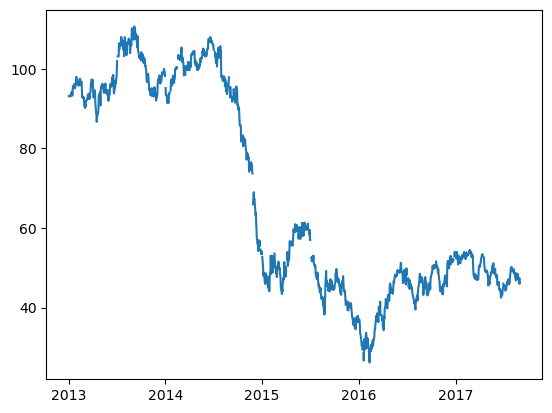

In [3]:
plt.plot(oil_df['date'], oil_df['dcoilwtico'])

In [4]:
store_sales = pd.read_csv('train.csv',
    usecols=['store_nbr', 'family', 'date', 'sales', 'onpromotion'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'sales': 'float32',
        'onpromotion': 'uint32',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
)

In [5]:
family_products=store_sales.family.unique()
family_products

['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS', ..., 'POULTRY', 'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD']
Length: 33
Categories (33, object): ['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', ..., 'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD']

In [6]:
store_sales['date'] = store_sales.date.dt.to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family', 'date']).sort_index()

family_sales = (
    store_sales
    .groupby(['family', 'date'])
    .mean()
    .unstack('family')
)
family_sales

sales                                                          \
family     AUTOMOTIVE BABY CARE    BEAUTY    BEVERAGES     BOOKS BREAD/BAKERY   
date                                                                            
2013-01-01   0.000000  0.000000  0.037037    15.000000  0.000000     3.344241   
2013-01-02   4.722222  0.000000  3.833333  1335.036987  0.000000   486.042938   
2013-01-03   2.981482  0.000000  2.314815   964.907410  0.000000   341.786682   
2013-01-04   3.129630  0.000000  2.462963  1003.092590  0.000000   309.666077   
2013-01-05   6.333333  0.000000  3.537037  1441.074097  0.000000   414.217804   
...               ...       ...       ...          ...       ...          ...   
2017-08-11   8.166667  0.129630  6.500000  3502.055664  0.000000   522.305298   
2017-08-12   7.462963  0.055556  6.833333  3376.259277  0.000000   507.473114   
2017-08-13   8.907408  0.166667  8.018518  3747.296387  0.018519   615.976990   
2017-08-14   5.407407  0.166667  6.240741  3237.629639  0.000000   518.564026   
2017-08-15   6.240741  0.148148  6.277778  3162.462891  0.000000   539.966553   

                                                             ... onpromotion  \
family     CELEBRATION     CLEANING       DAIRY        DELI  ...   MAGAZINES   
date                                                         ...               
2013-01-01    0.000000     3.444444    2.648148    1.316481  ...         0.0   
2013-01-02    0.000000  1382.018555  432.981476  291.750000  ...         0.0   
2013-01-03    0.000000  1035.055542  333.351837  206.897308  ...         0.0   
2013-01-04    0.000000   964.148132  336.074066  187.837204  ...         0.0   
2013-01-05    0.000000  1298.666626  427.444458  254.350830  ...         0.0   
...                ...          ...         ...         ...  ...         ...   
2017-08-11   16.111111  1031.148193  831.648132  345.934967  ...         0.0   
2017-08-12   15.722222  1072.870361  793.592590  290.553589  ...         0.0   
2017-08-13   10.074074  1143.648193  928.000000  325.801361  ...         0.0   
2017-08-14   11.000000  1019.111084  797.222229  271.532227  ...         0.0   
2017-08-15   11.055555  1082.851807  753.833313  276.582458  ...         0.0   

                                                                          \
family          MEATS PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS   
date                                                                       
2013-01-01   0.000000      0.000000          0.0                0.000000   
2013-01-02   0.000000      0.000000          0.0                0.000000   
2013-01-03   0.000000      0.000000          0.0                0.000000   
2013-01-04   0.000000      0.000000          0.0                0.000000   
2013-01-05   0.000000      0.000000          0.0                0.000000   
...               ...           ...          ...                     ...   
2017-08-11  22.925926      9.000000          0.0                0.000000   
2017-08-12   0.000000      8.703704          0.0                0.018519   
2017-08-13   0.000000      9.240741          0.0                0.000000   
2017-08-14   0.000000      8.722222          0.0                0.000000   
2017-08-15   0.000000      8.814815          0.0                0.092593   

                                                                            \
family        POULTRY PREPARED FOODS    PRODUCE SCHOOL AND OFFICE SUPPLIES   
date                                                                         
2013-01-01   0.000000       0.000000   0.000000                   0.000000   
2013-01-02   0.000000       0.000000   0.000000                   0.000000   
2013-01-03   0.000000       0.000000   0.000000                   0.000000   
2013-01-04   0.000000       0.000000   0.000000                   0.000000   
2013-01-05   0.000000       0.000000   0.000000                   0.000000   
...               ...            ...        ...                        

# Trend

### find out trend for every product from family_products

<AxesSubplot:title={'center':'Trend check'}, xlabel='date'>

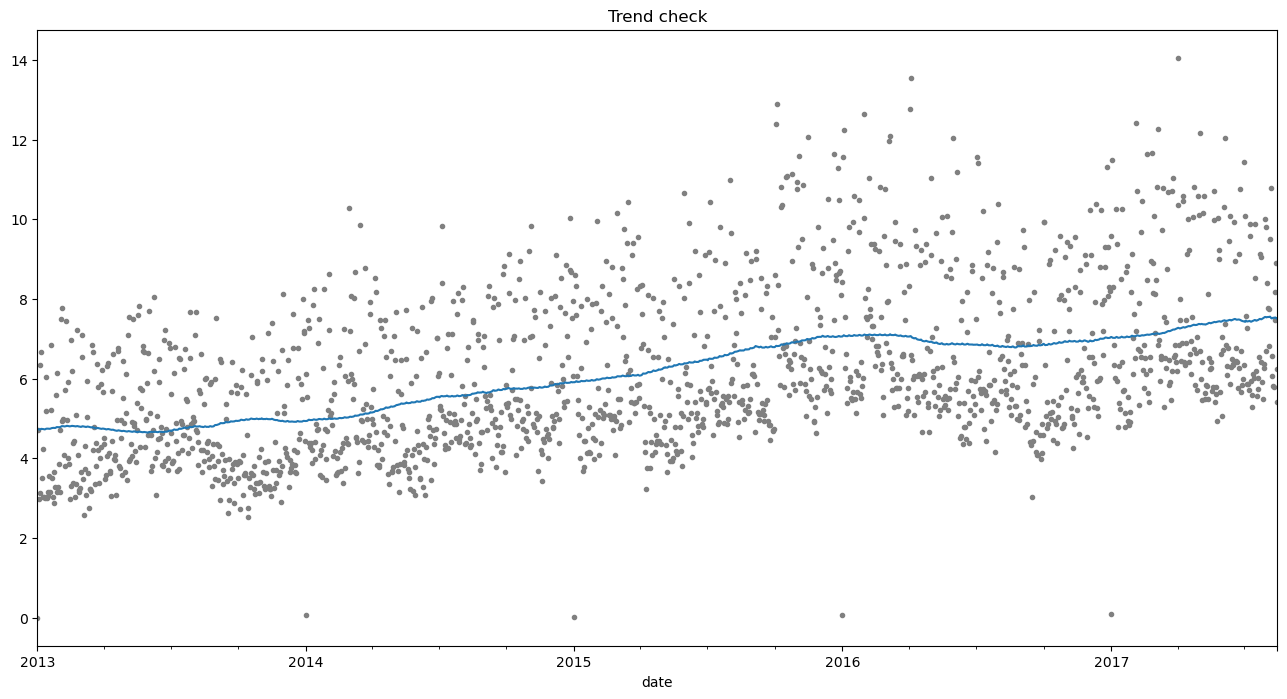

In [7]:
moving_average=family_sales.sales['AUTOMOTIVE'].rolling(window=365, center=True, min_periods=183).mean()
ax=family_sales.sales['AUTOMOTIVE'].plot(style=".", color="0.5", figsize=(16, 8))
moving_average.plot(ax=ax, legend=False, title='Trend check')

In [8]:
# Trend: Yes

<AxesSubplot:title={'center':'Trend check'}, xlabel='date'>

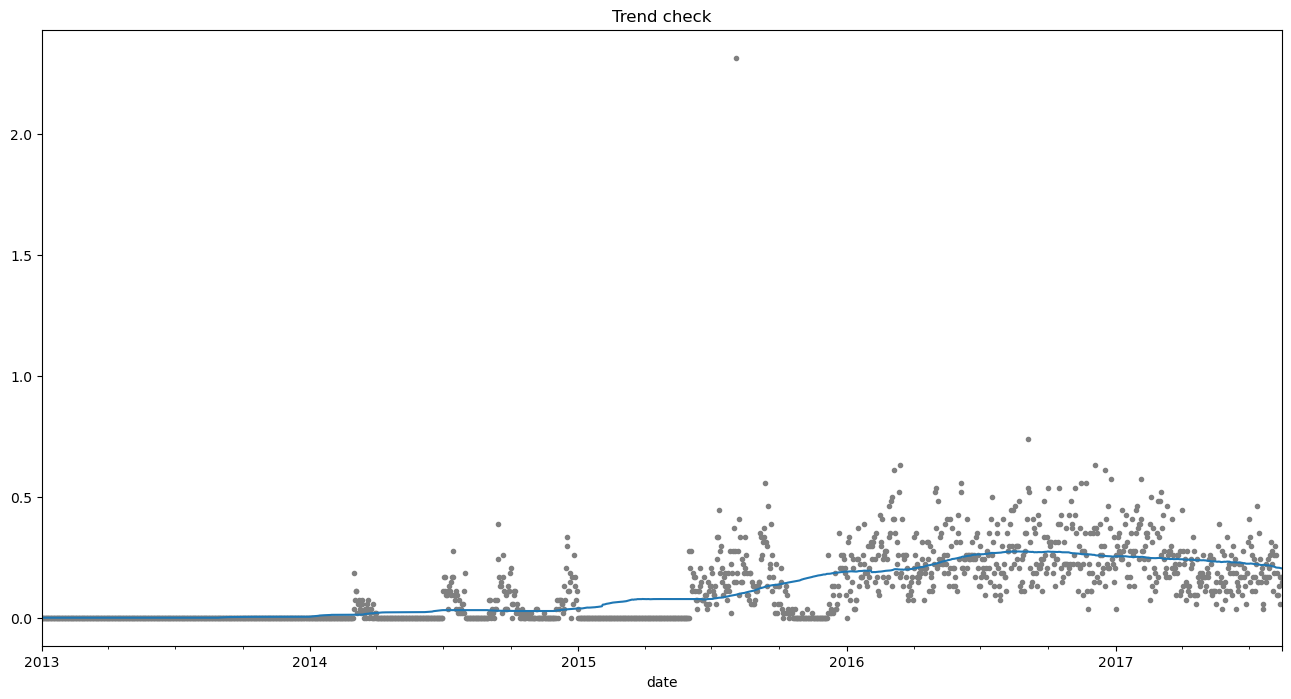

In [9]:
moving_average=family_sales.sales['BABY CARE'].rolling(window=365, center=True, min_periods=183).mean()
ax=family_sales.sales['BABY CARE'].plot(style=".", color="0.5", figsize=(16, 8))
moving_average.plot(ax=ax, legend=False, title='Trend check')

In [10]:
#Trend: No

<AxesSubplot:title={'center':'Trend check'}, xlabel='date'>

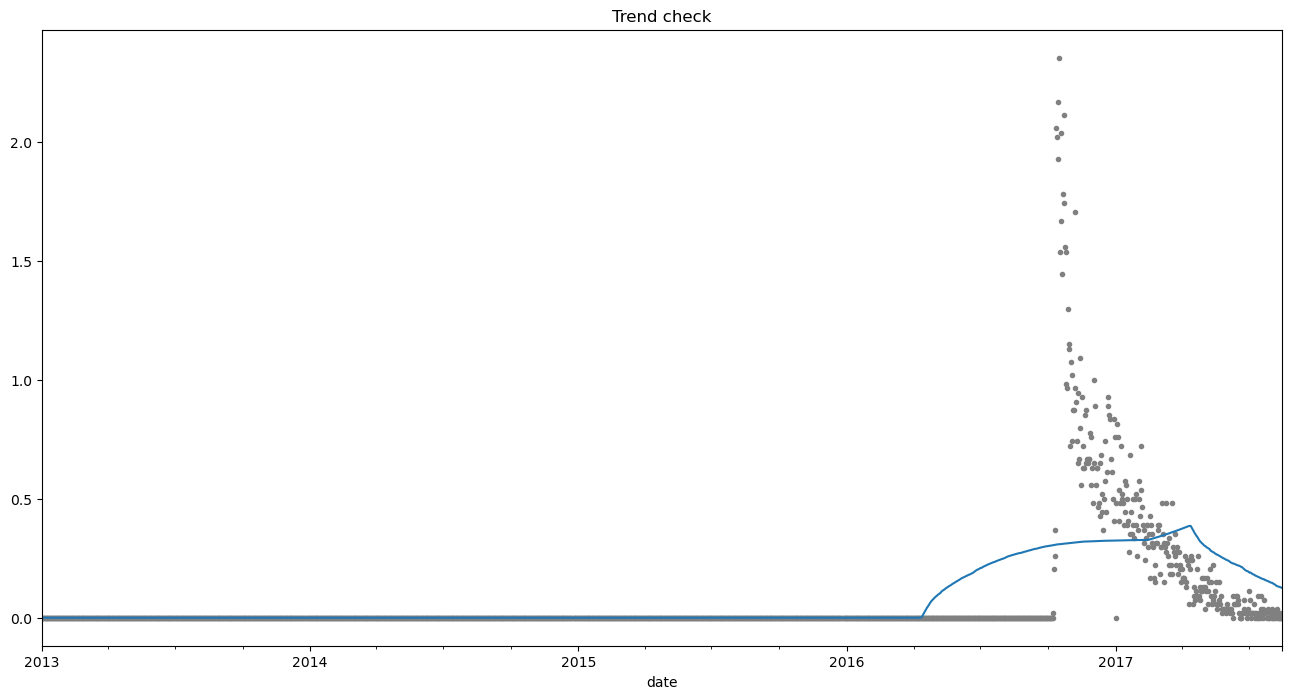

In [11]:
moving_average=family_sales.sales['BOOKS'].rolling(window=365, center=True, min_periods=183).mean()
ax=family_sales.sales['BOOKS'].plot(style=".", color="0.5", figsize=(16, 8))
moving_average.plot(ax=ax, legend=False, title='Trend check')

<AxesSubplot:title={'center':'Trend check'}, xlabel='date'>

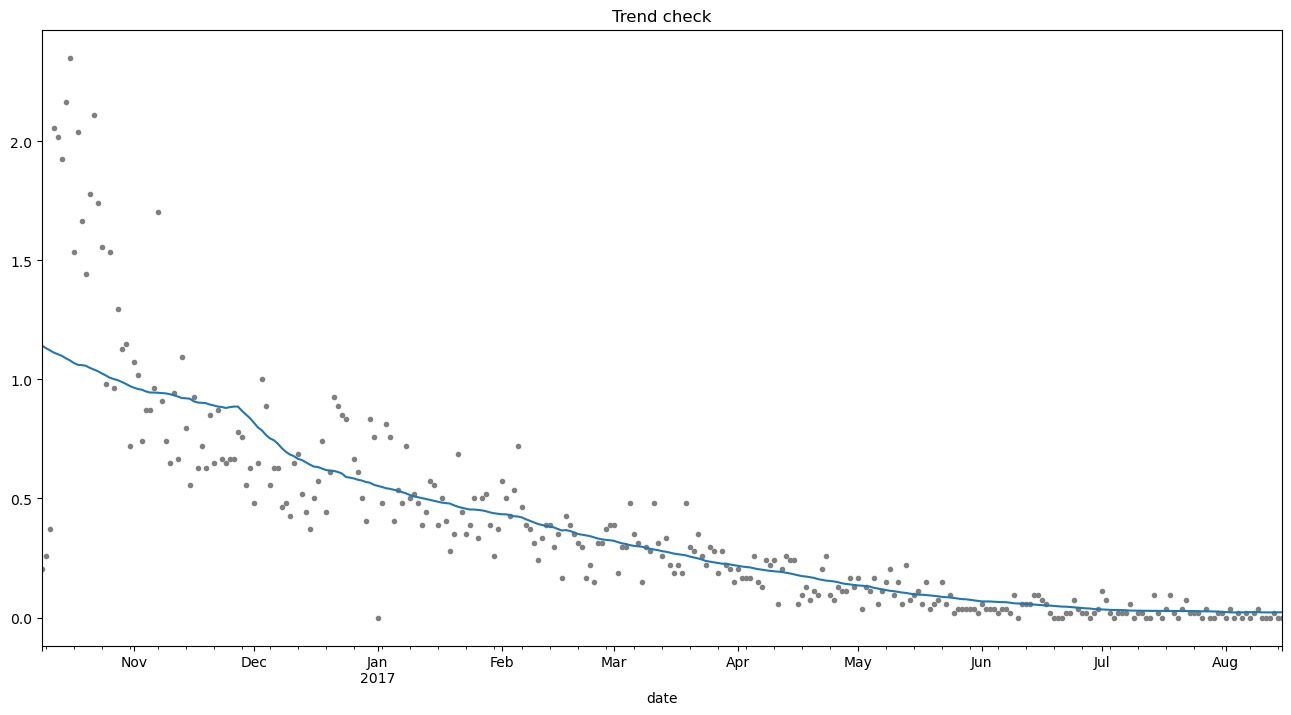

In [12]:
moving_average=family_sales.loc['2016-10-09': ,('sales', "BOOKS")].rolling(window=92, center=True, min_periods=30).mean()
ax=family_sales.loc['2016-10-09': ,('sales', "BOOKS")].plot(style=".", color="0.5", figsize=(16, 8))
moving_average.plot(ax=ax, legend=False, title='Trend check')

In [13]:
#Trend: Yes, order=2
# Started from Oct 2016

## Seasons

### find out seasons for every product from family_products

In [14]:
from warnings import simplefilter
import seaborn as sns

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

In [15]:
X = family_sales.copy()

# days within a week
X["day"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year

In [16]:
# Weekly seasons, annual seasons

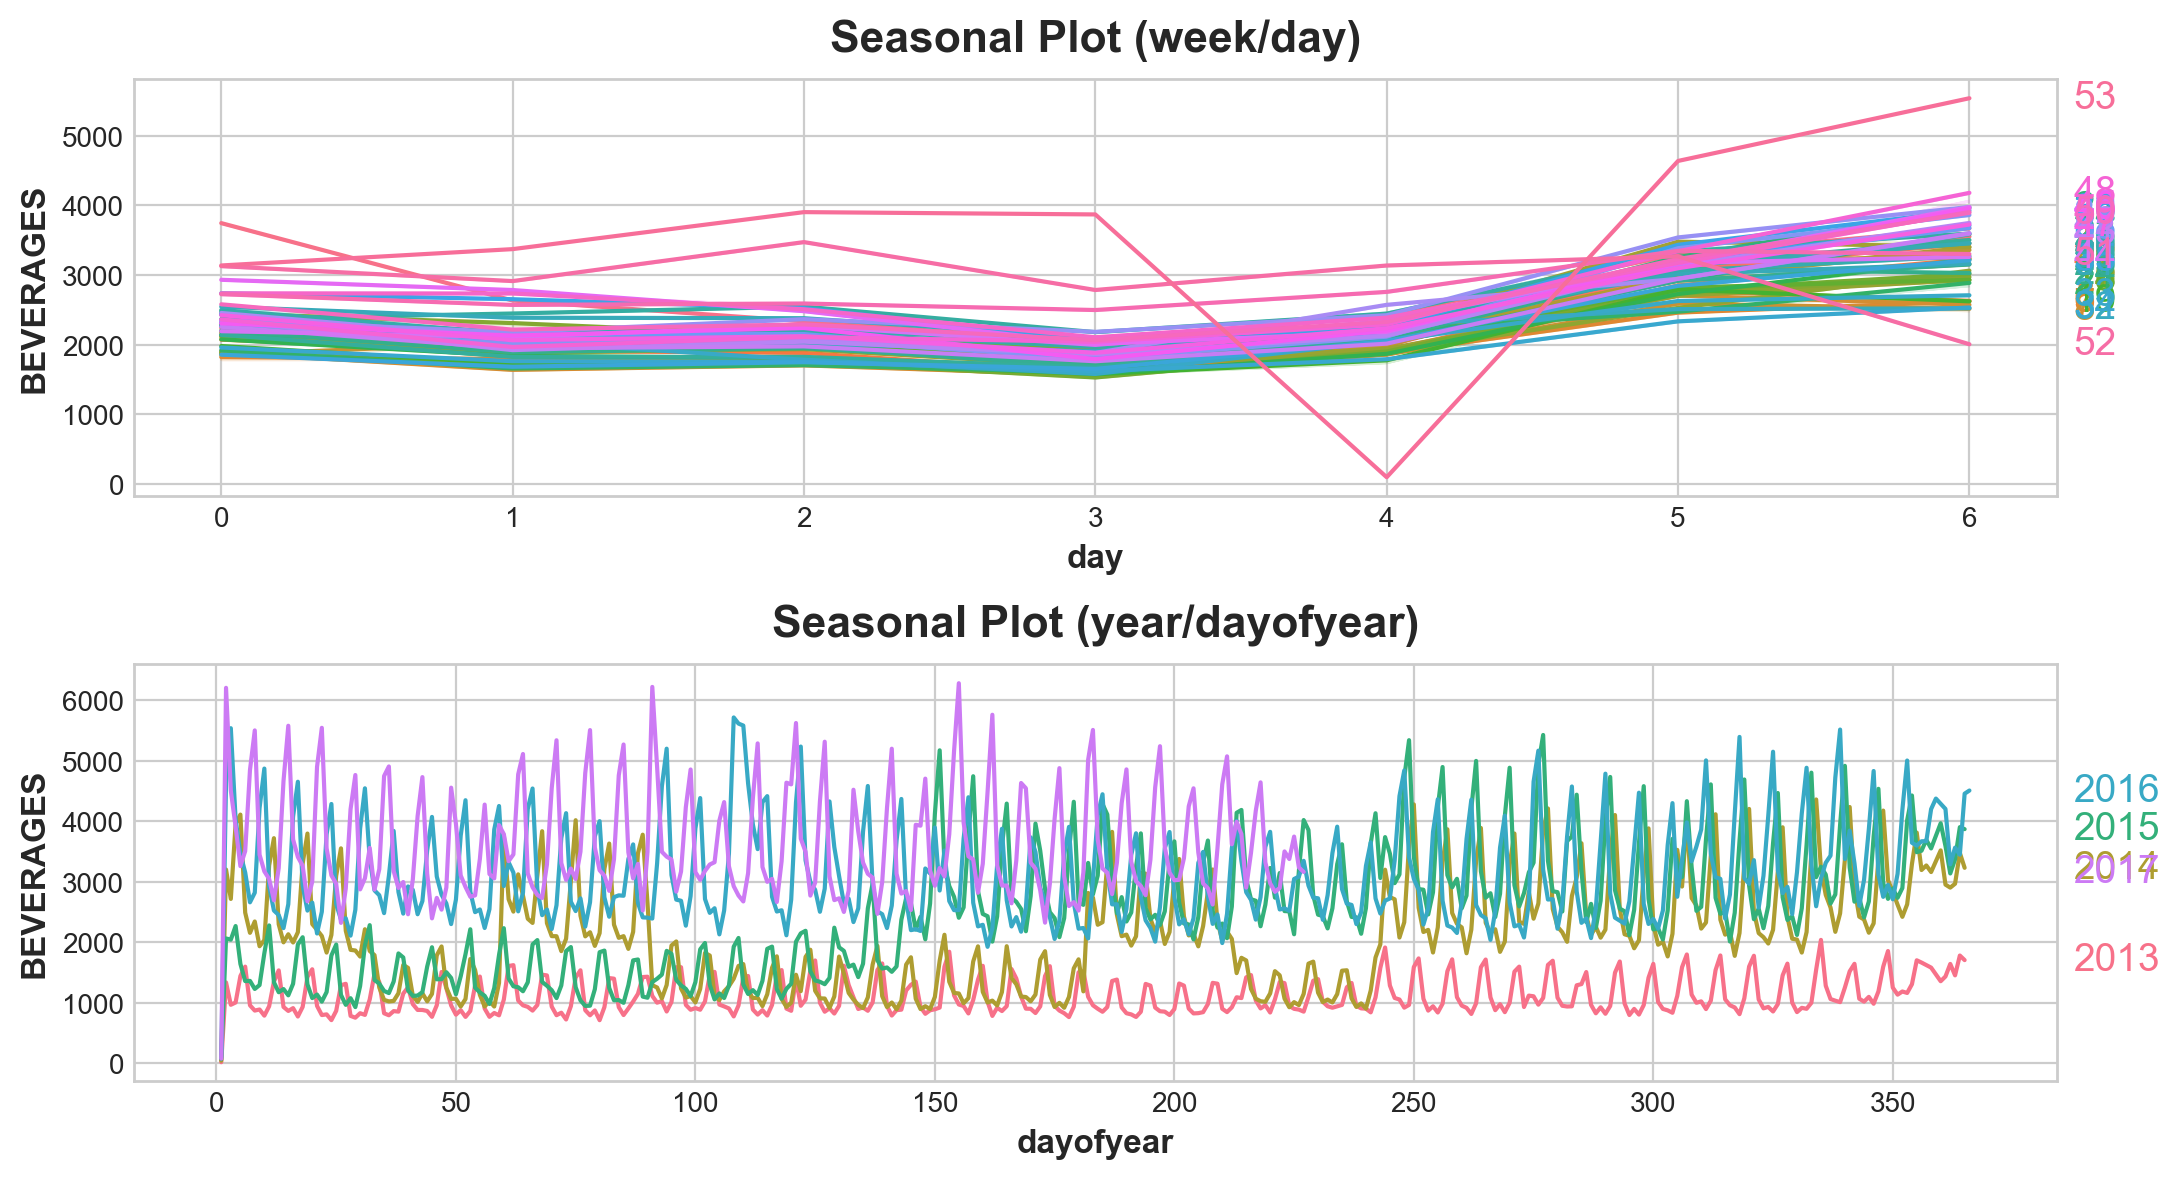

In [17]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y=X.sales["BEVERAGES"], period="week", freq="day", ax=ax0)
seasonal_plot(X, y=X.sales["BEVERAGES"], period="year", freq="dayofyear", ax=ax1);

<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

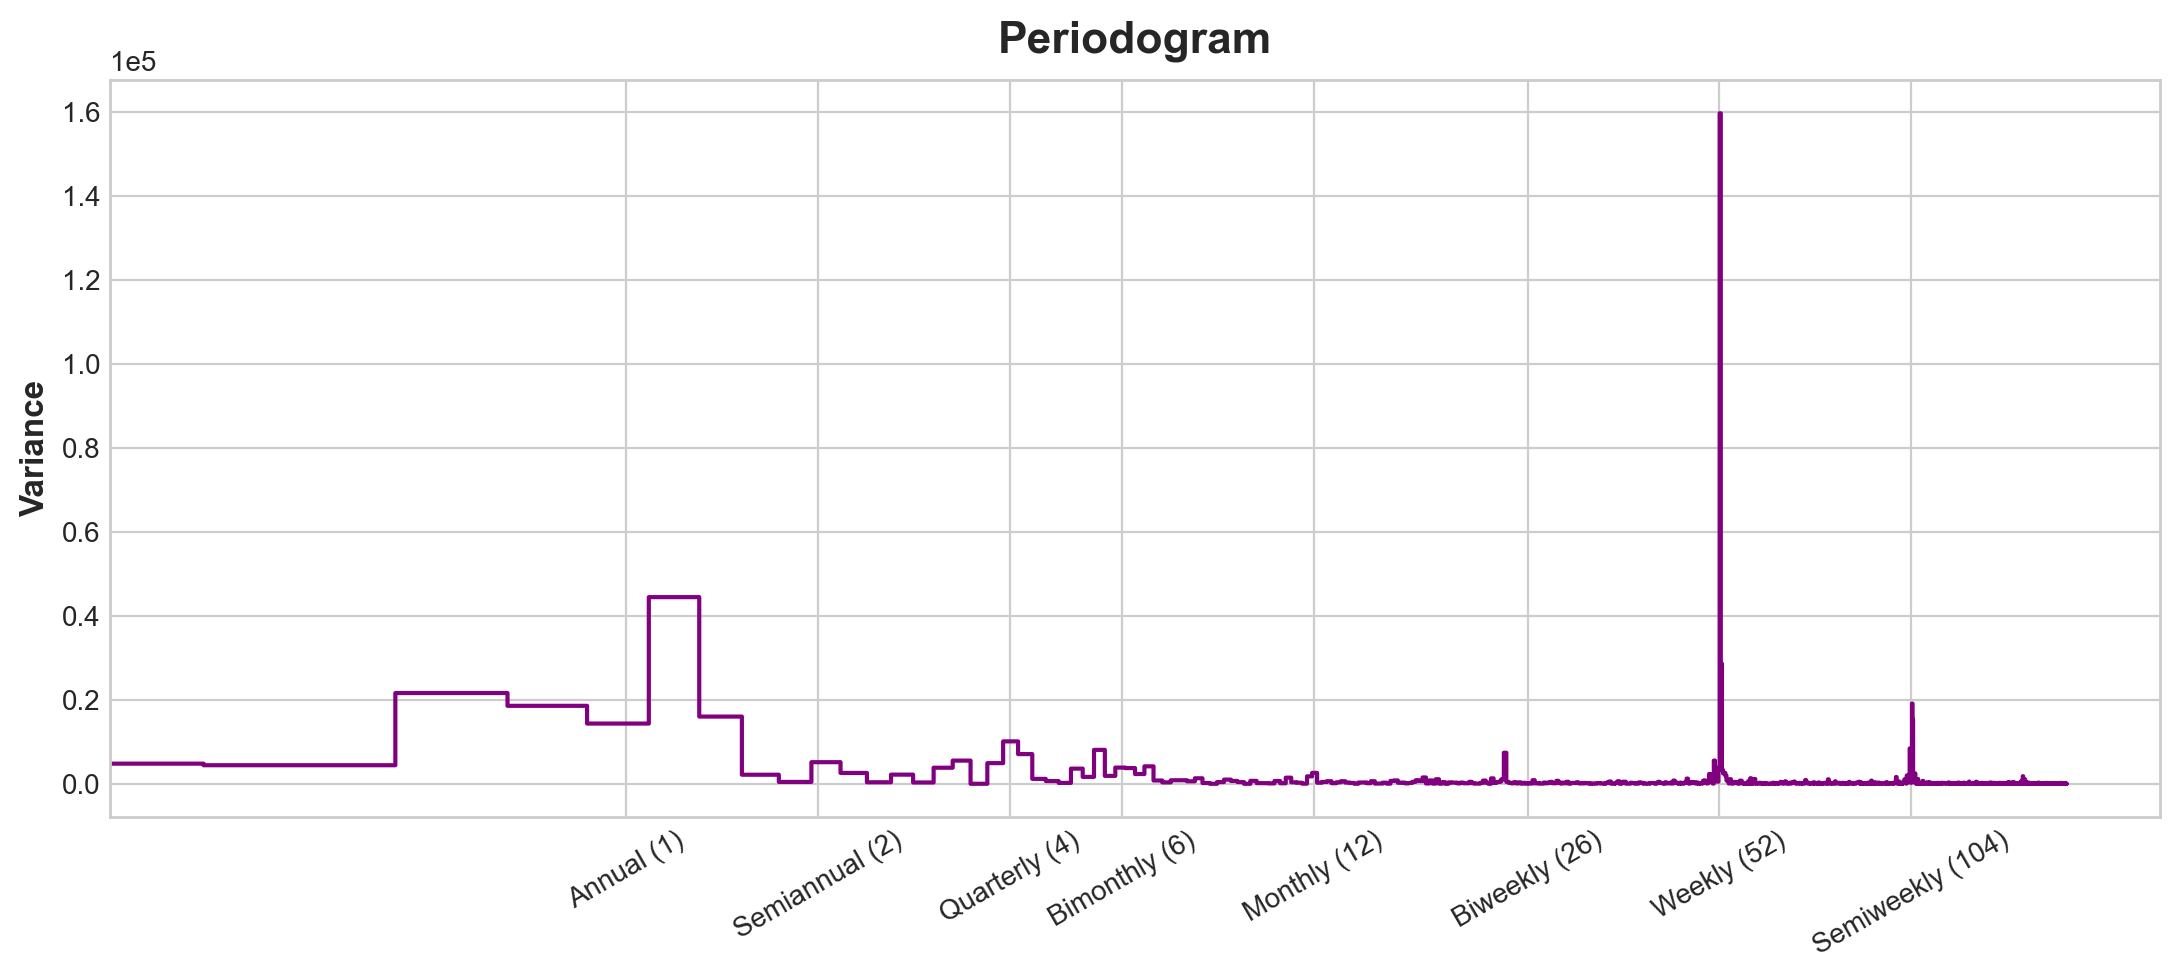

In [18]:
plot_periodogram(X.sales["BEVERAGES"])

In [19]:
# From seasonal plot (week/day) we see strong weekly seasons, and from seasonal plot (year/dayofyear) 
#and periodogramweak annual seasons 

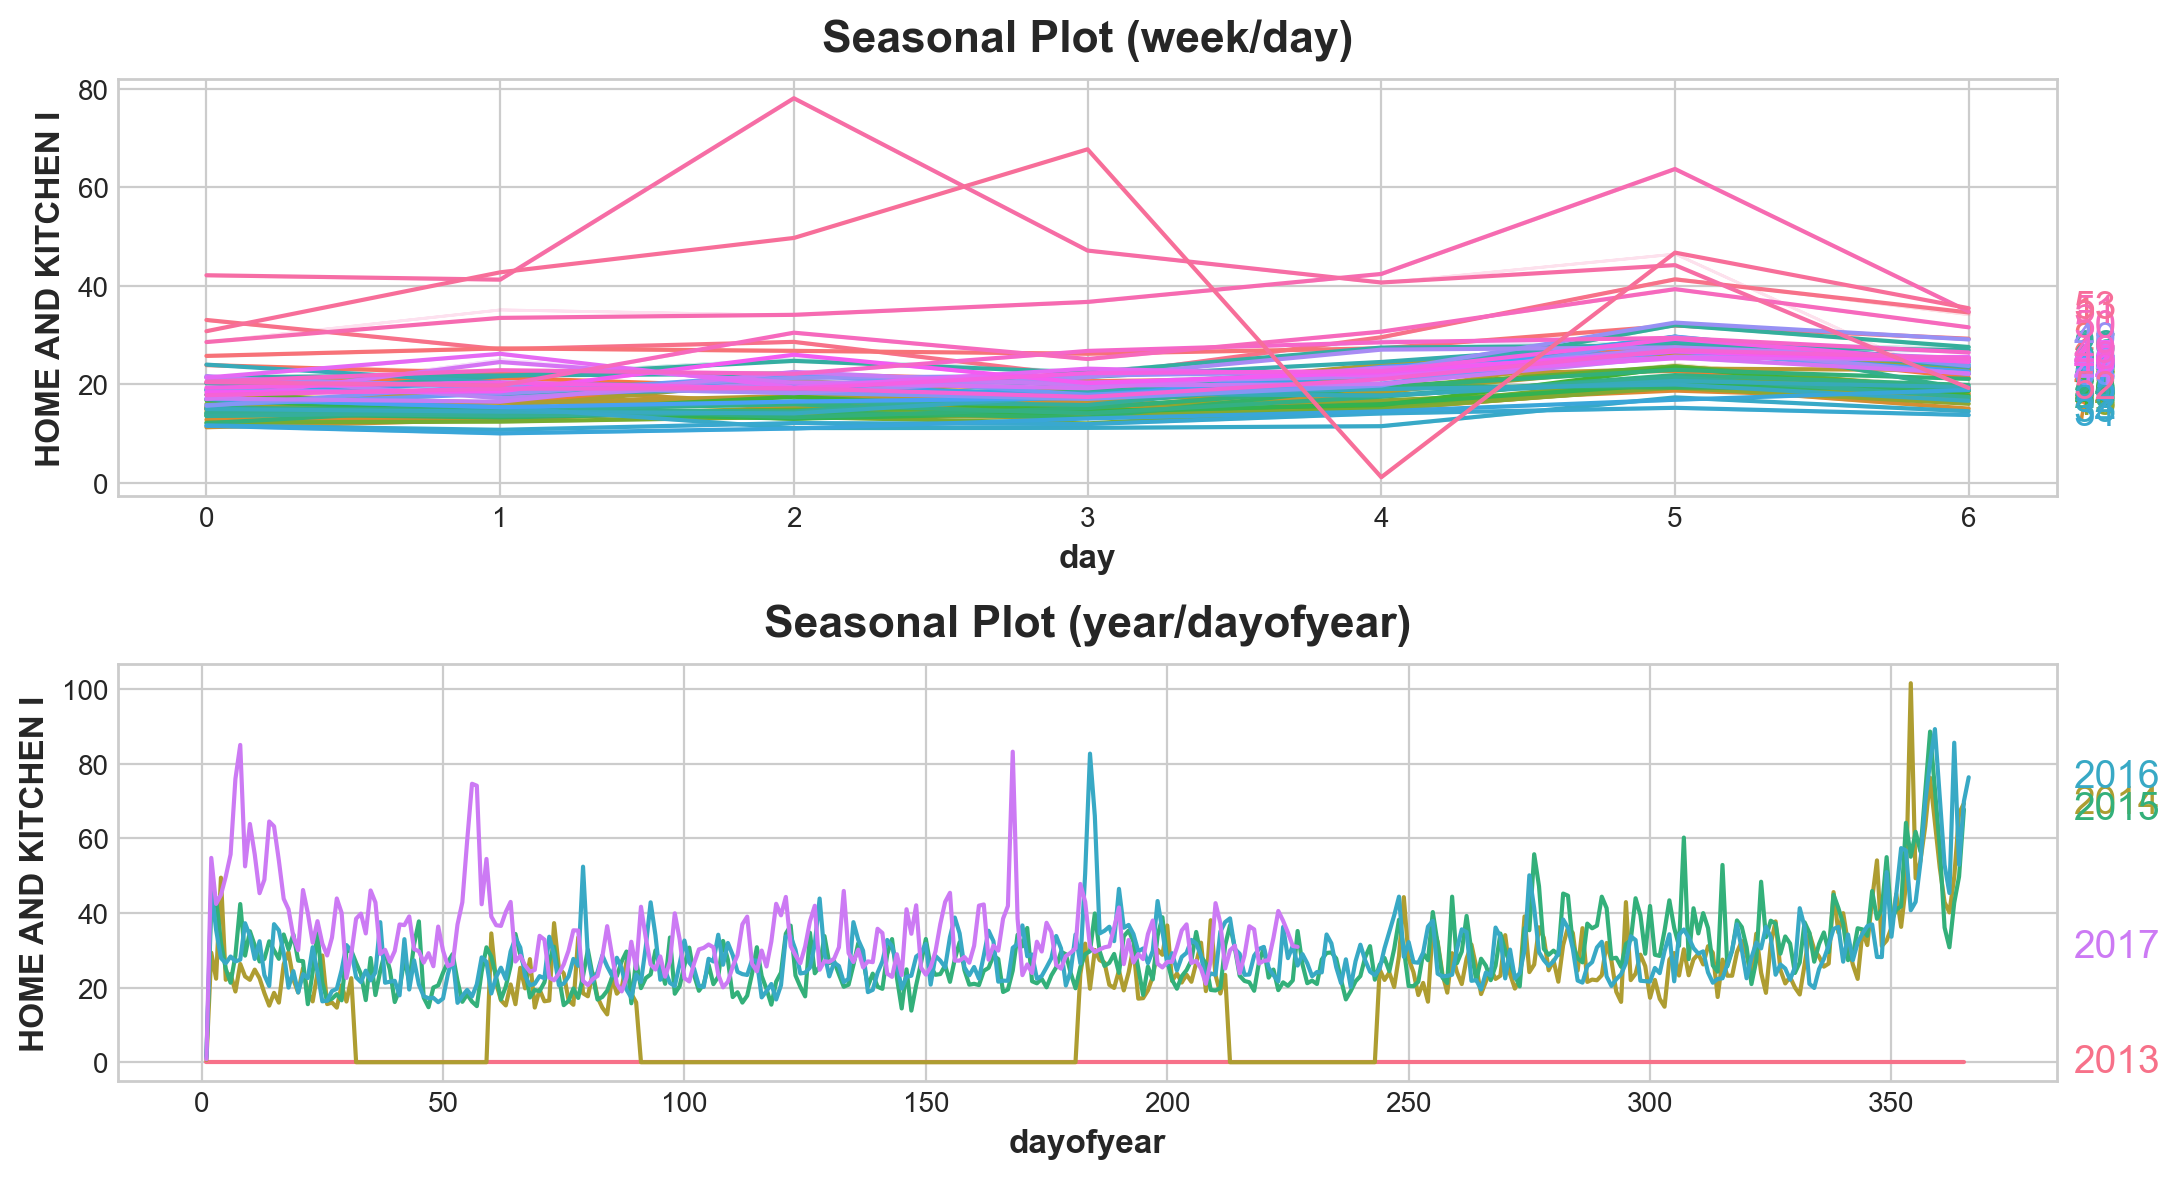

In [20]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y=X.sales["HOME AND KITCHEN I"], period="week", freq="day", ax=ax0)
seasonal_plot(X, y=X.sales["HOME AND KITCHEN I"], period="year", freq="dayofyear", ax=ax1);

<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

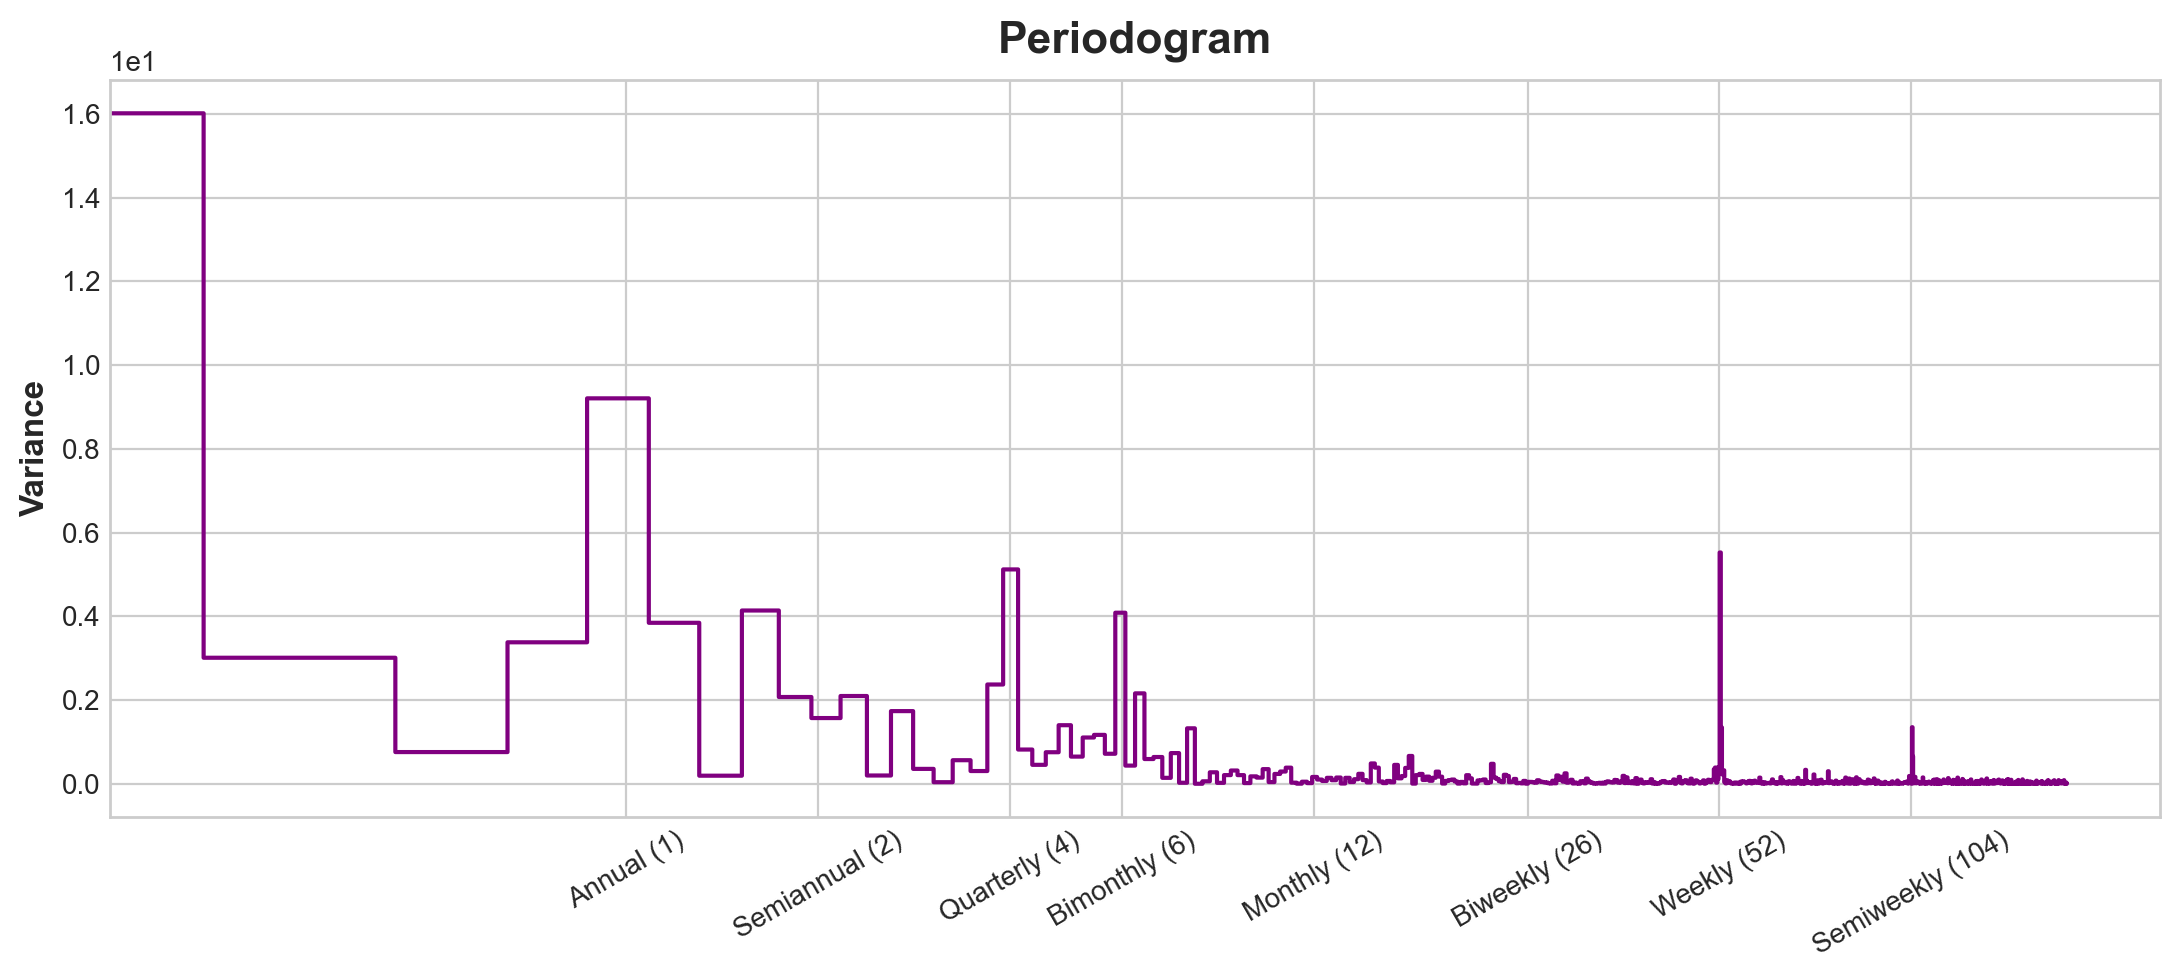

In [21]:
plot_periodogram(X.sales["HOME AND KITCHEN I"])

In [22]:
#From seasonal plot (week/day) we see weekly seasons, and from seasonal plot (year/dayofyear) 
#and periodogram bimonthly(6) annual seasons 

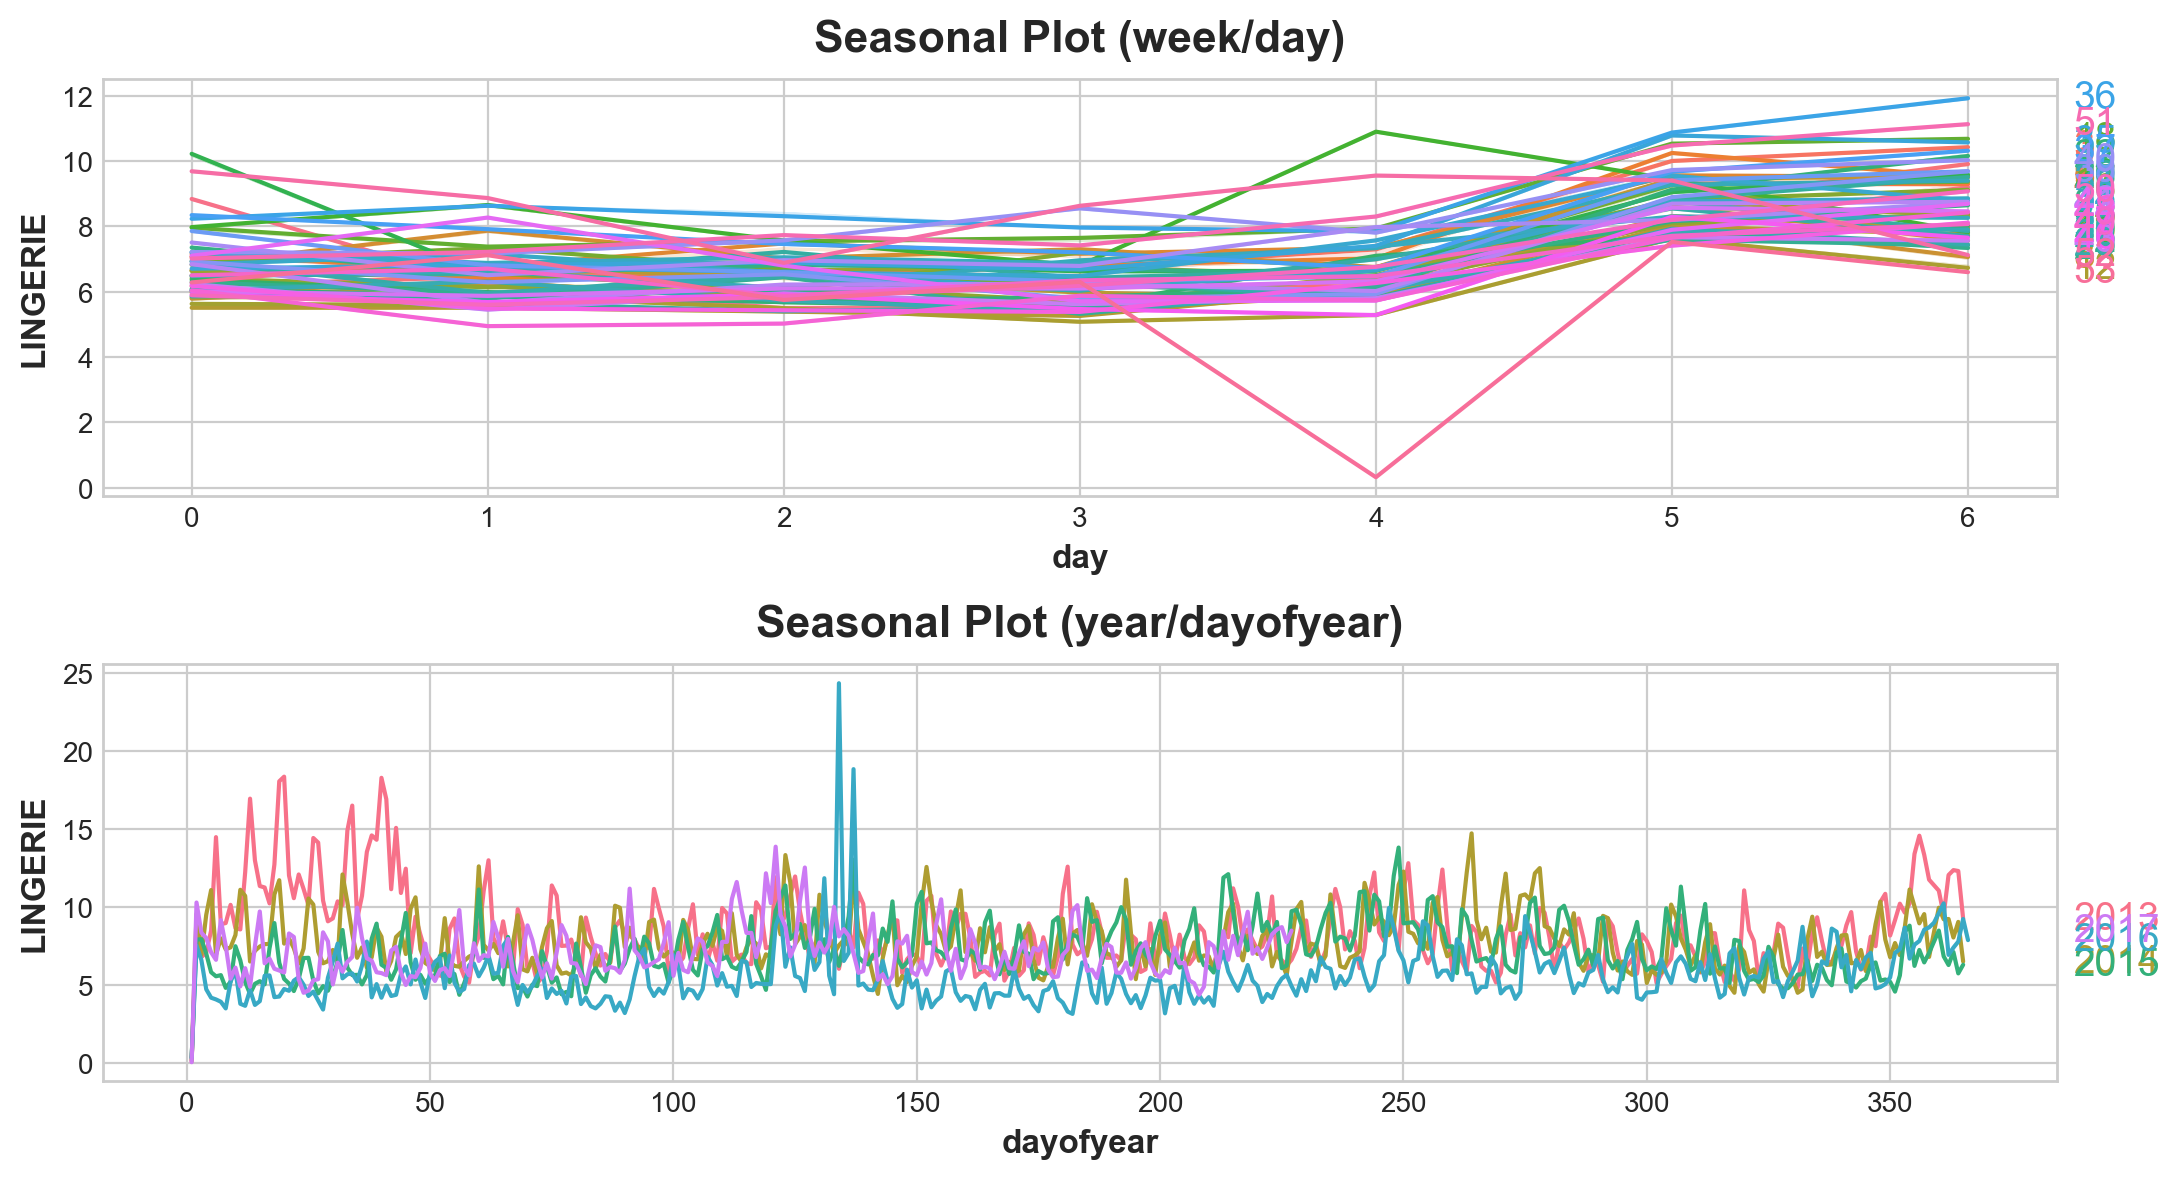

In [23]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y=X.sales["LINGERIE"], period="week", freq="day", ax=ax0)
seasonal_plot(X, y=X.sales["LINGERIE"], period="year", freq="dayofyear", ax=ax1);

<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

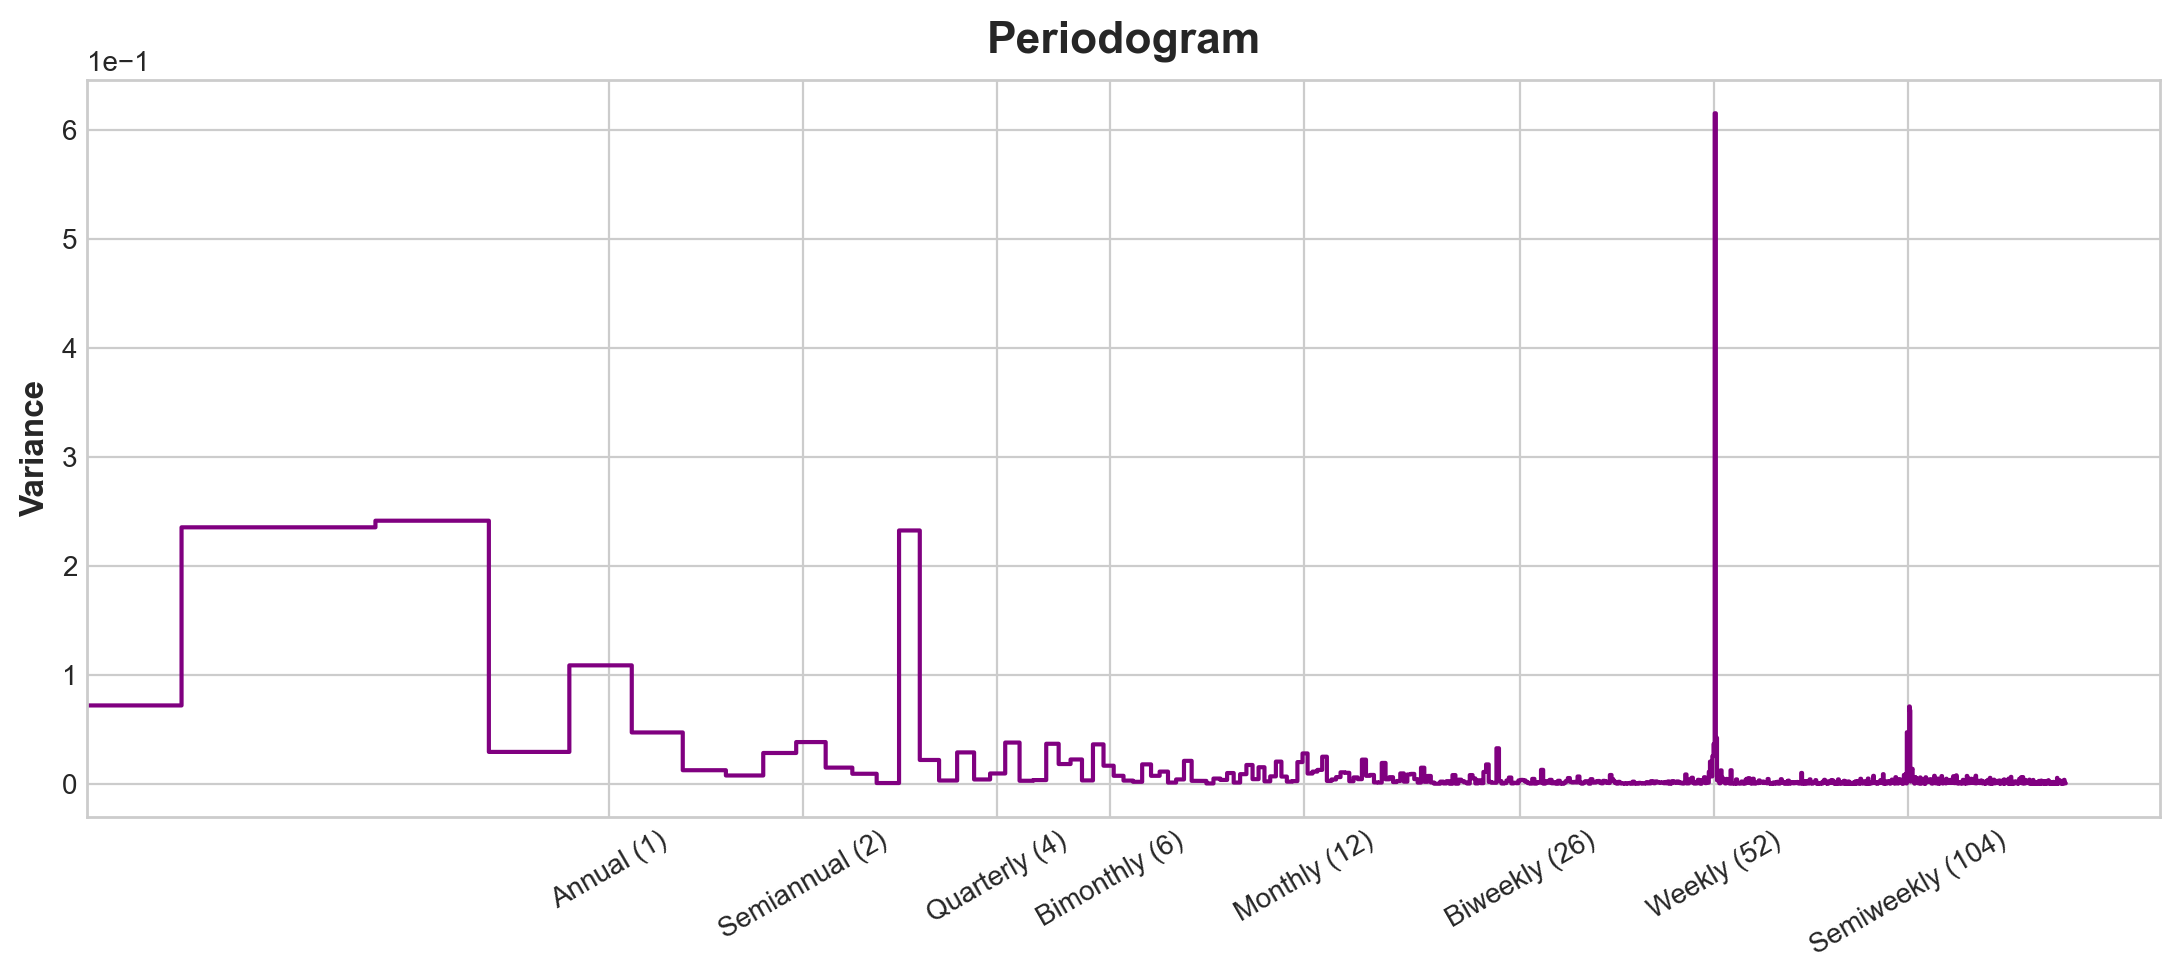

In [24]:
plot_periodogram(X.sales["LINGERIE"])

In [25]:
# From seasonal plot (year/dayofyear) and periodogram we see quarterly(4) annual seasons and 
#from seasonal plot (week/day) - strong weekly seasons

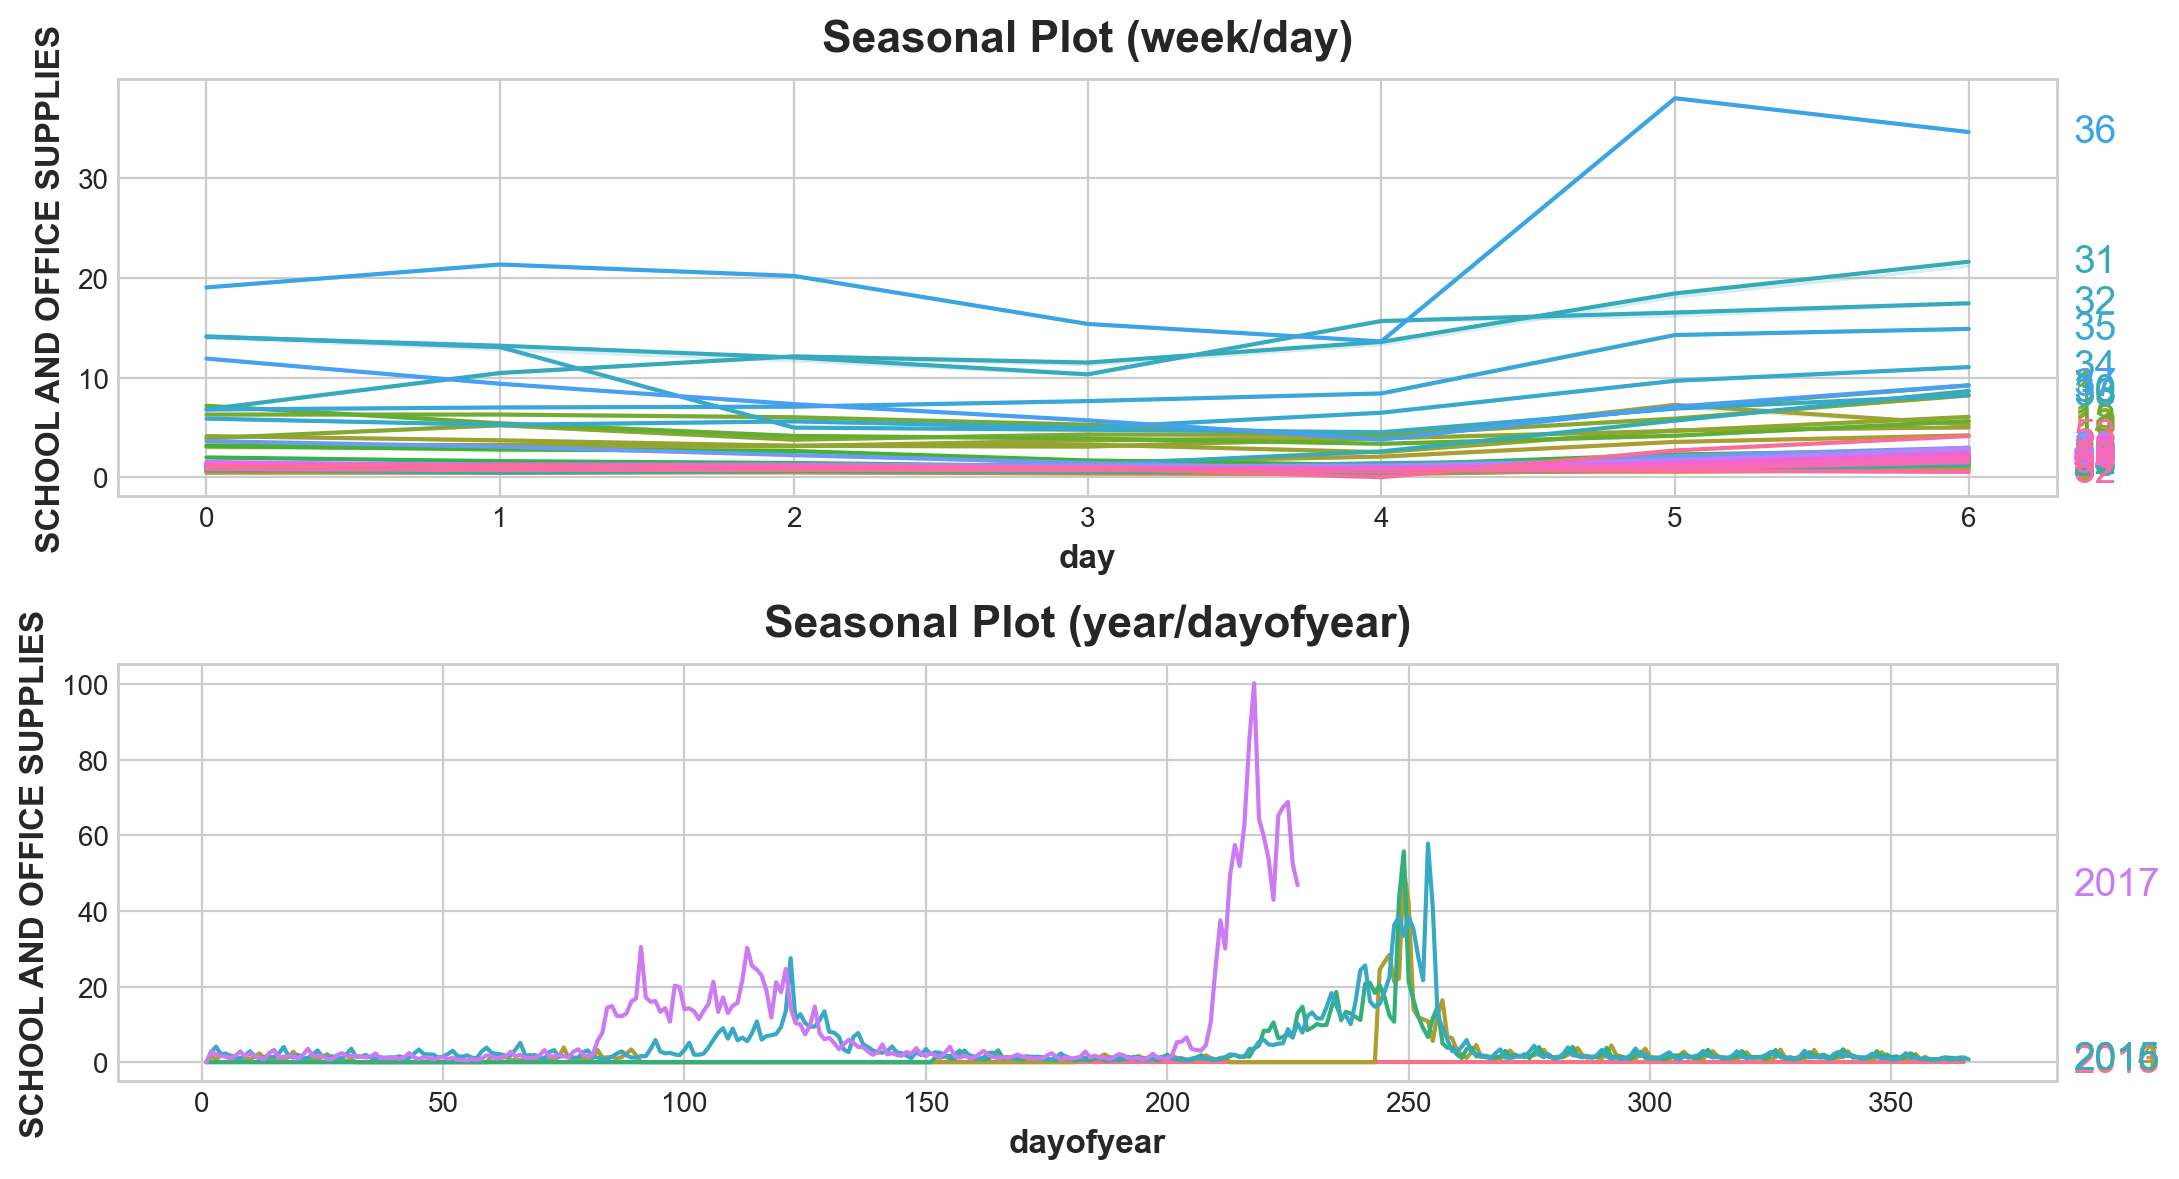

In [26]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y=X.sales["SCHOOL AND OFFICE SUPPLIES"], period="week", freq="day", ax=ax0)
seasonal_plot(X, y=X.sales["SCHOOL AND OFFICE SUPPLIES"], period="year", freq="dayofyear", ax=ax1);

<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

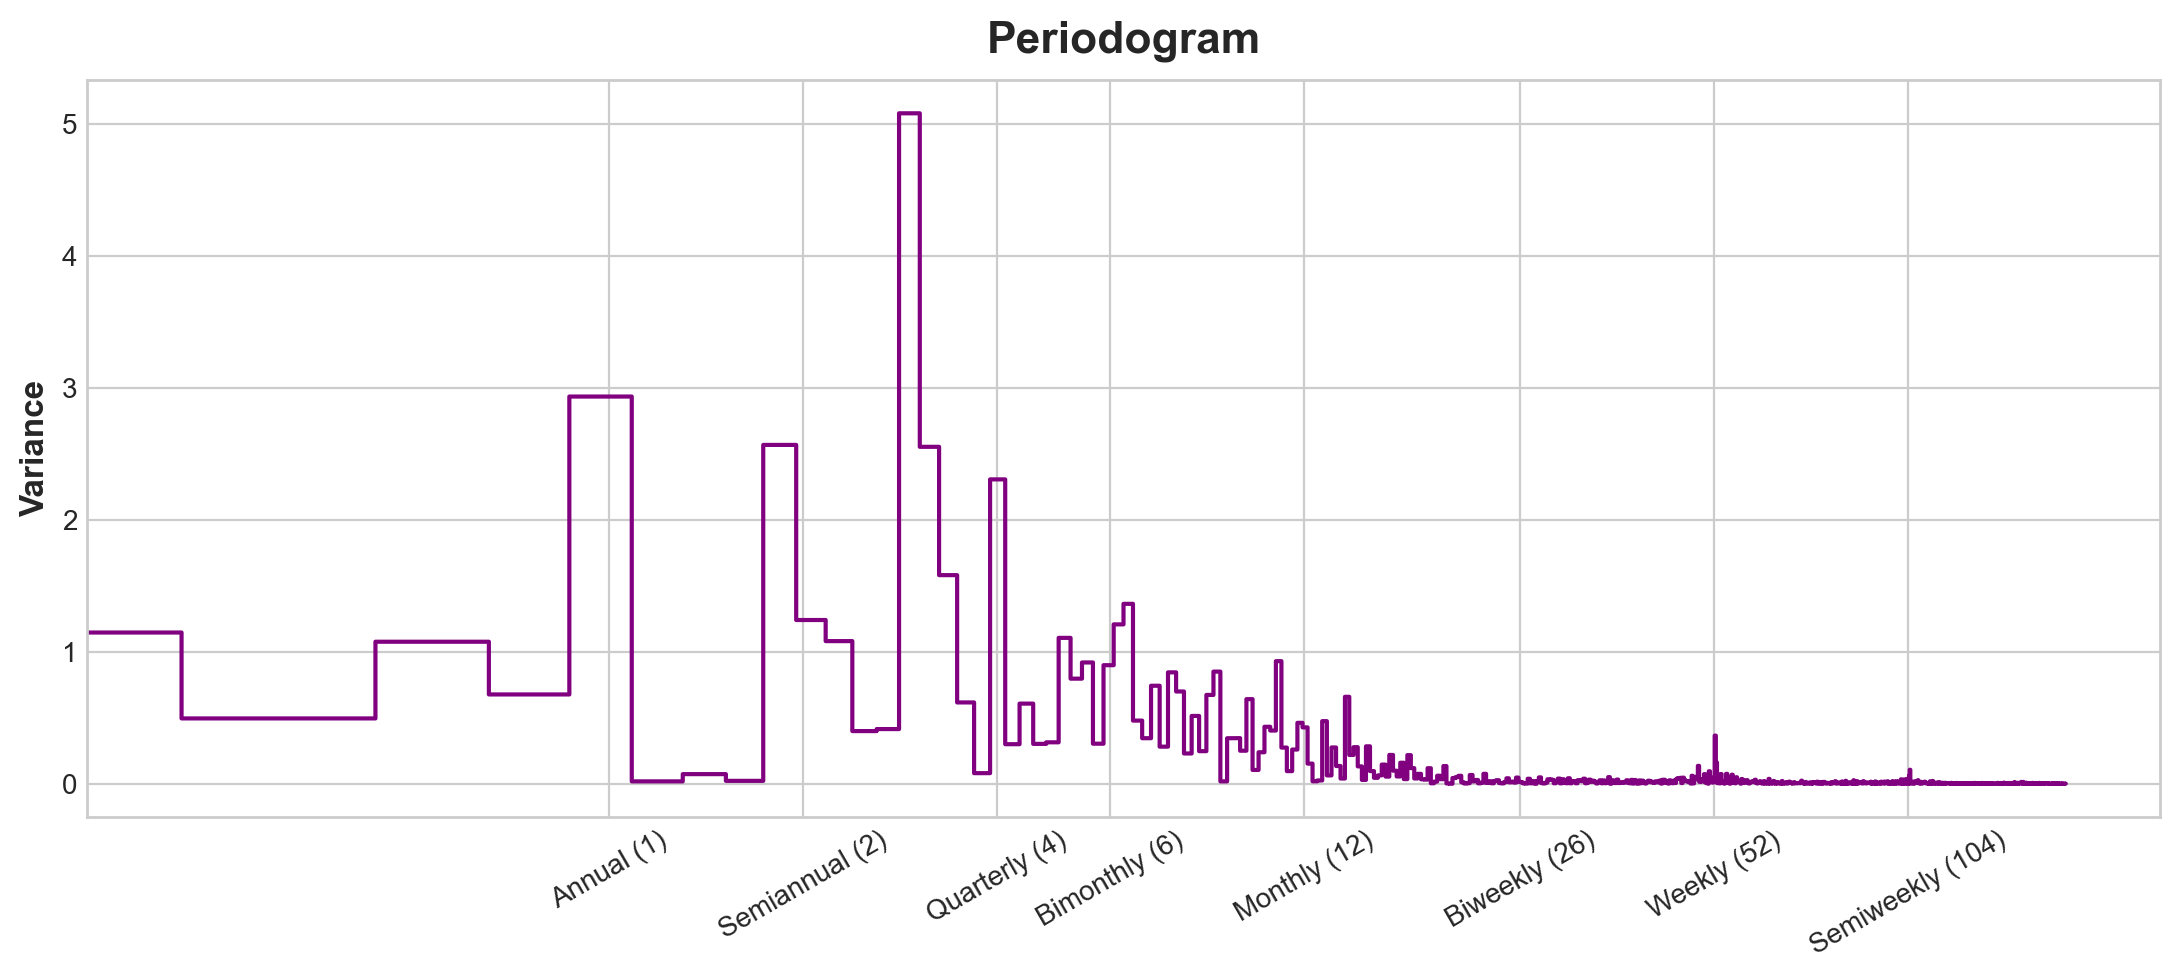

In [27]:
plot_periodogram(X.sales["SCHOOL AND OFFICE SUPPLIES"])

In [28]:
# From seasonal plots  and periodogram we see semiannual(2) annual seasons and NO weekly seasons

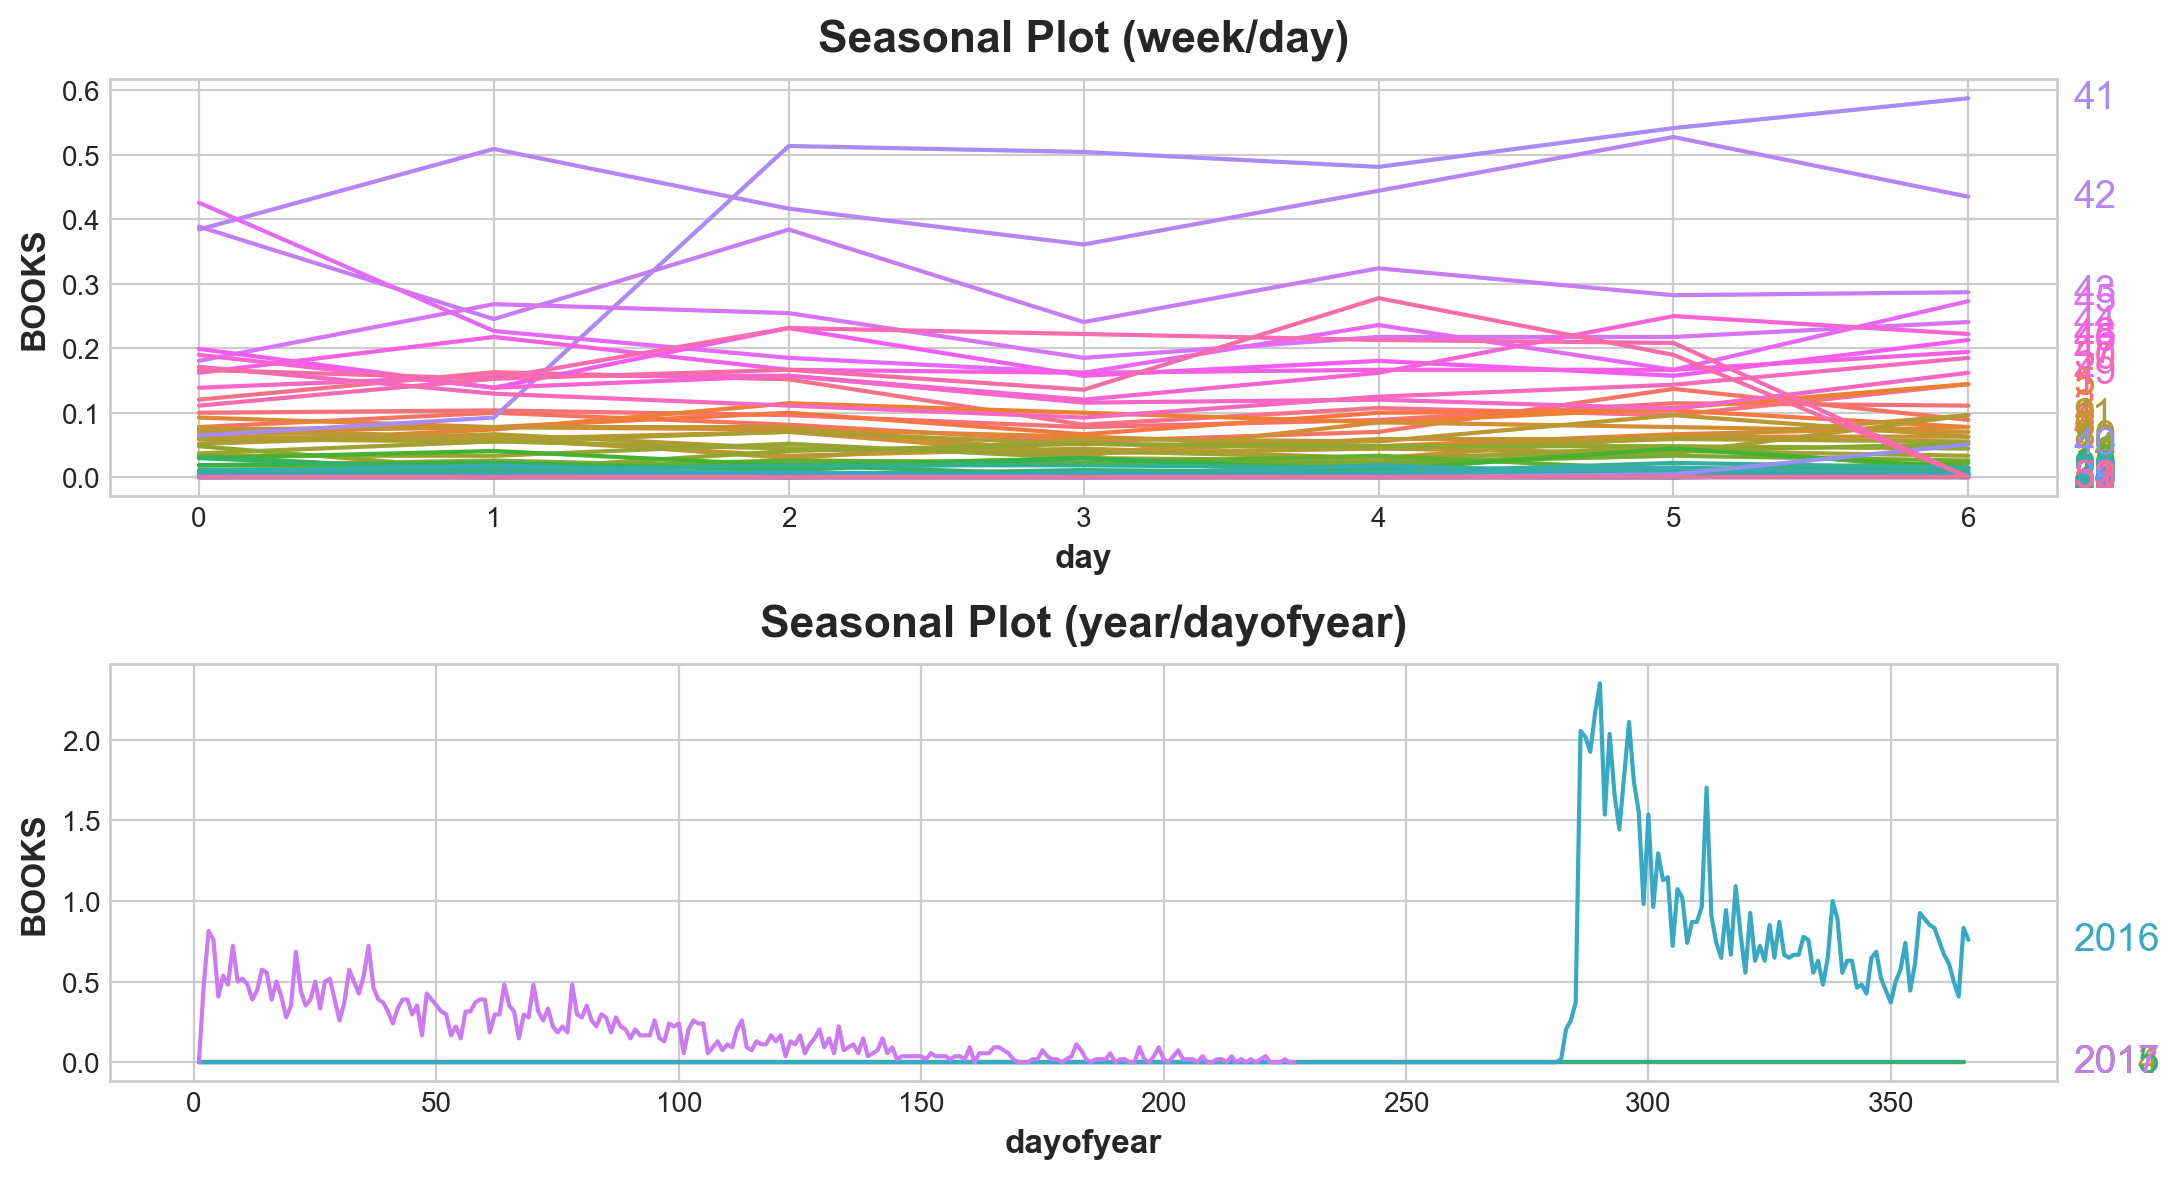

In [29]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y=X.sales["BOOKS"], period="week", freq="day", ax=ax0)
seasonal_plot(X, y=X.sales["BOOKS"], period="year", freq="dayofyear", ax=ax1);

<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

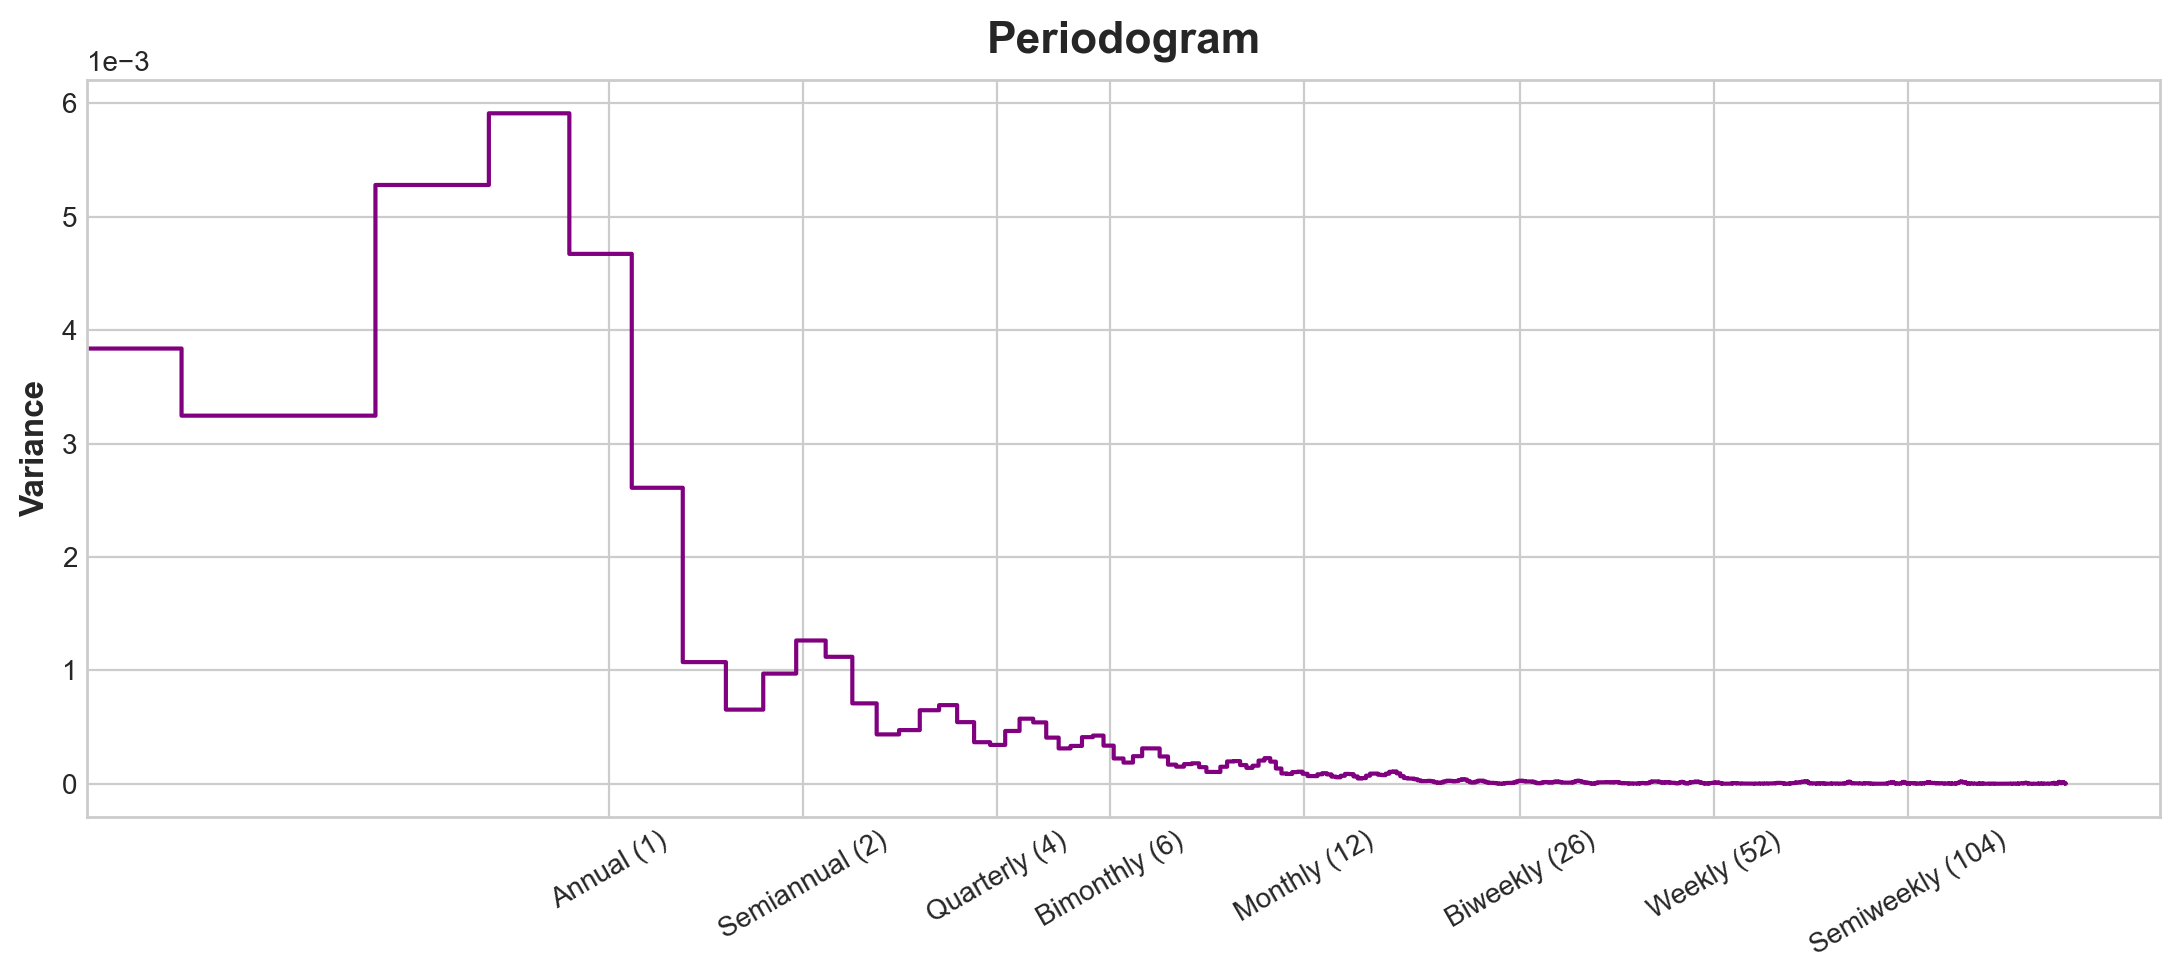

In [30]:
plot_periodogram(X.sales["BOOKS"])

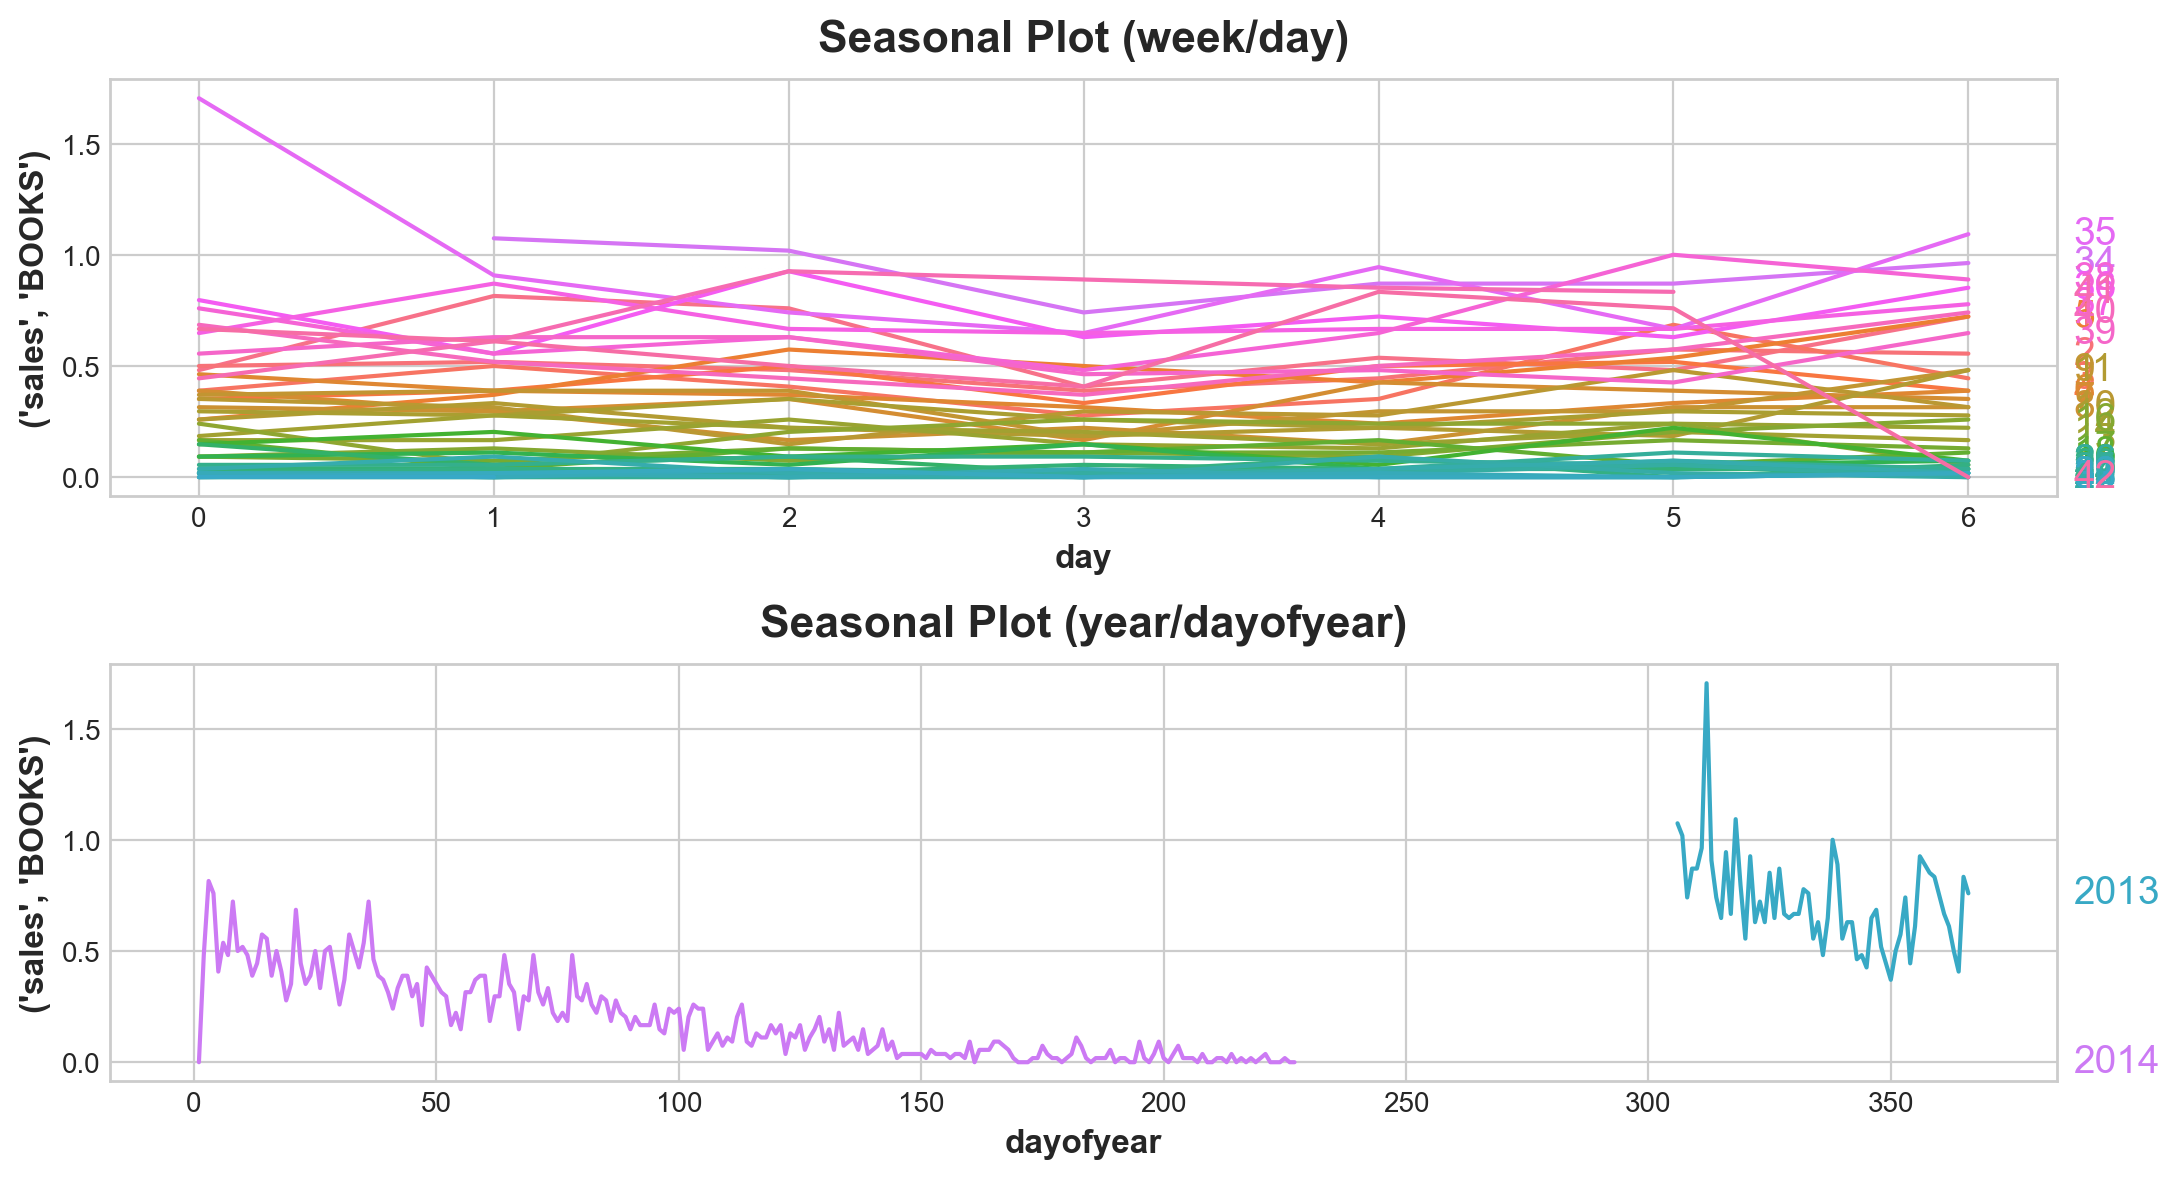

In [31]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y=X.loc['2016-11-01': ,('sales', "BOOKS")], period="week", freq="day", ax=ax0)
seasonal_plot(X, y=X.loc['2016-11-01': ,('sales', "BOOKS")], period="year", freq="dayofyear", ax=ax1);

In [32]:
# There is data only for less than 1 year period, so No seasons.

## Cycles

In [33]:
#Cycles as a serial dependence. Look at the lag plots of time series shows its values plotted against its lags. 
#The partial autocorrelation tells the correlation of a lag accounting for all of the previous lags

In [34]:
def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig


In [35]:
from pathlib import Path
#from warnings import simplefilter

import numpy as np
from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_pacf

#simplefilter("ignore")

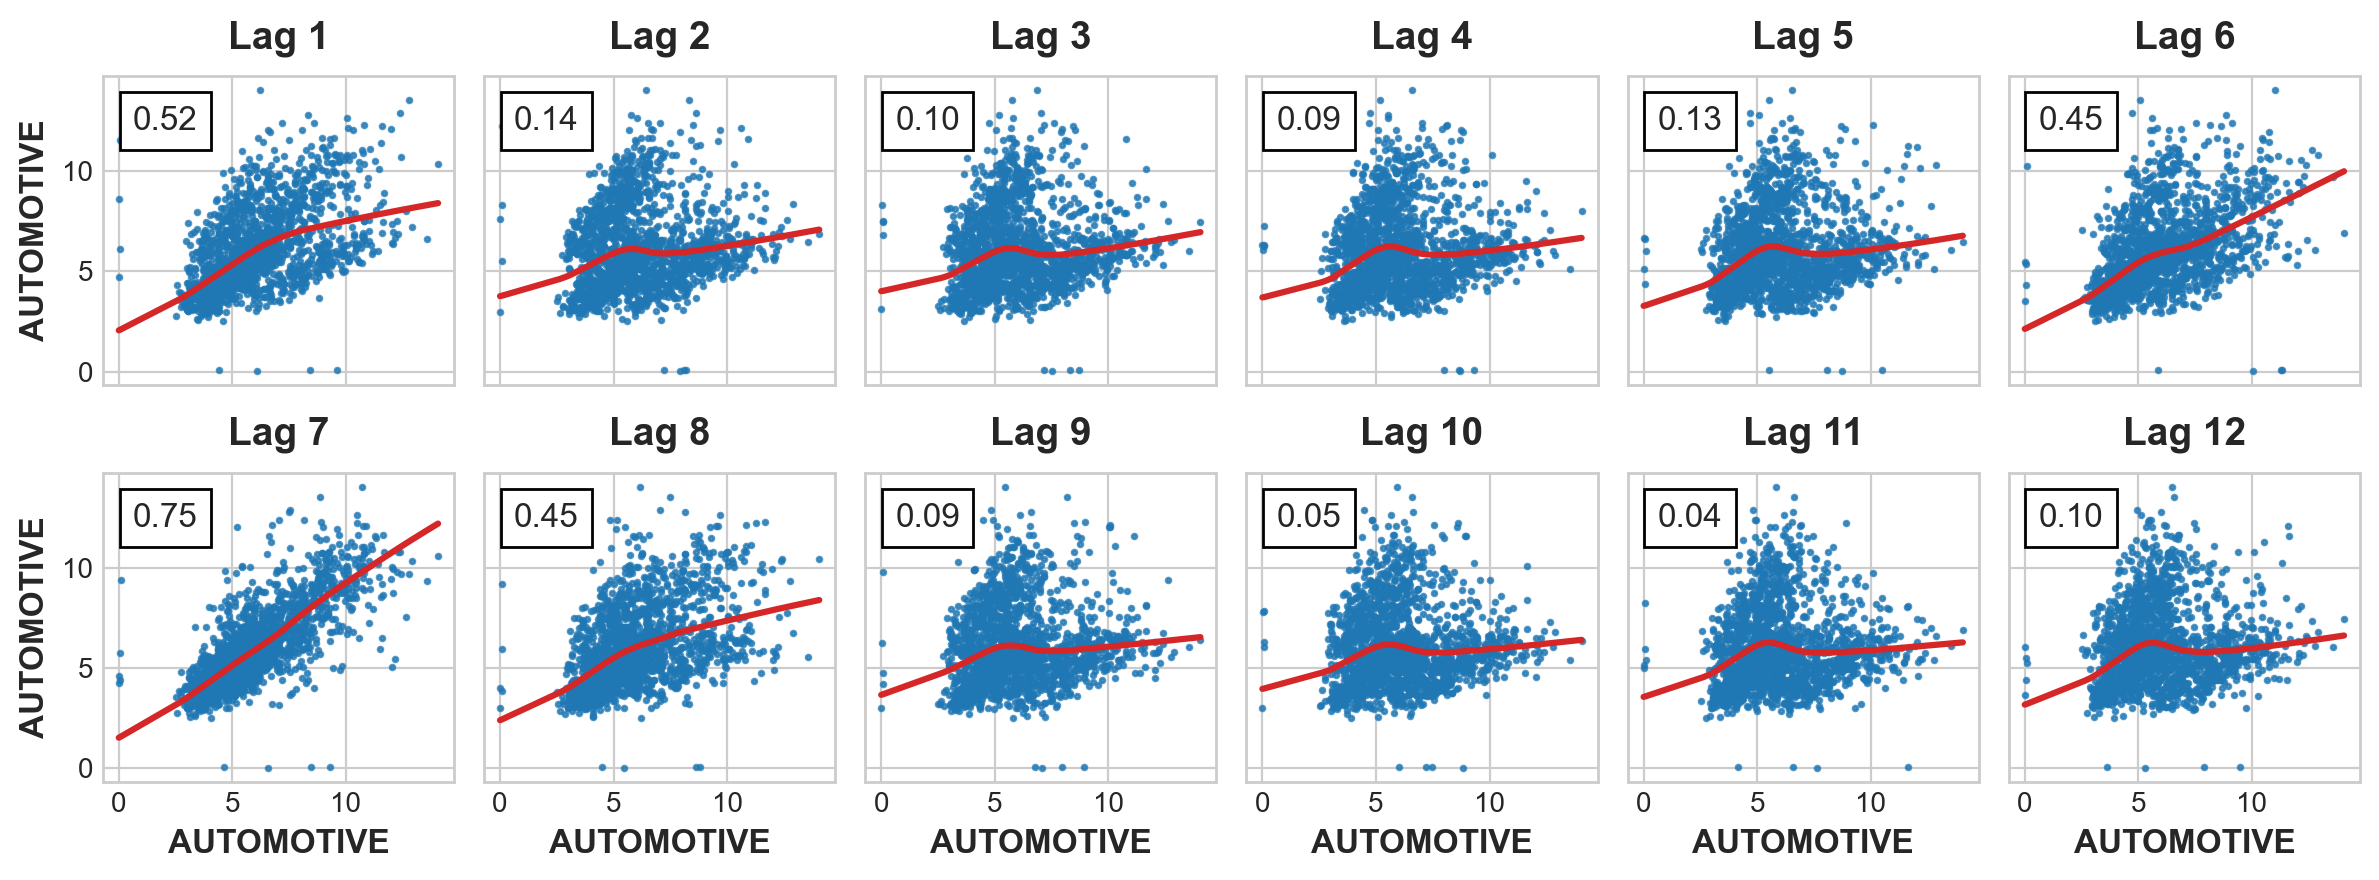

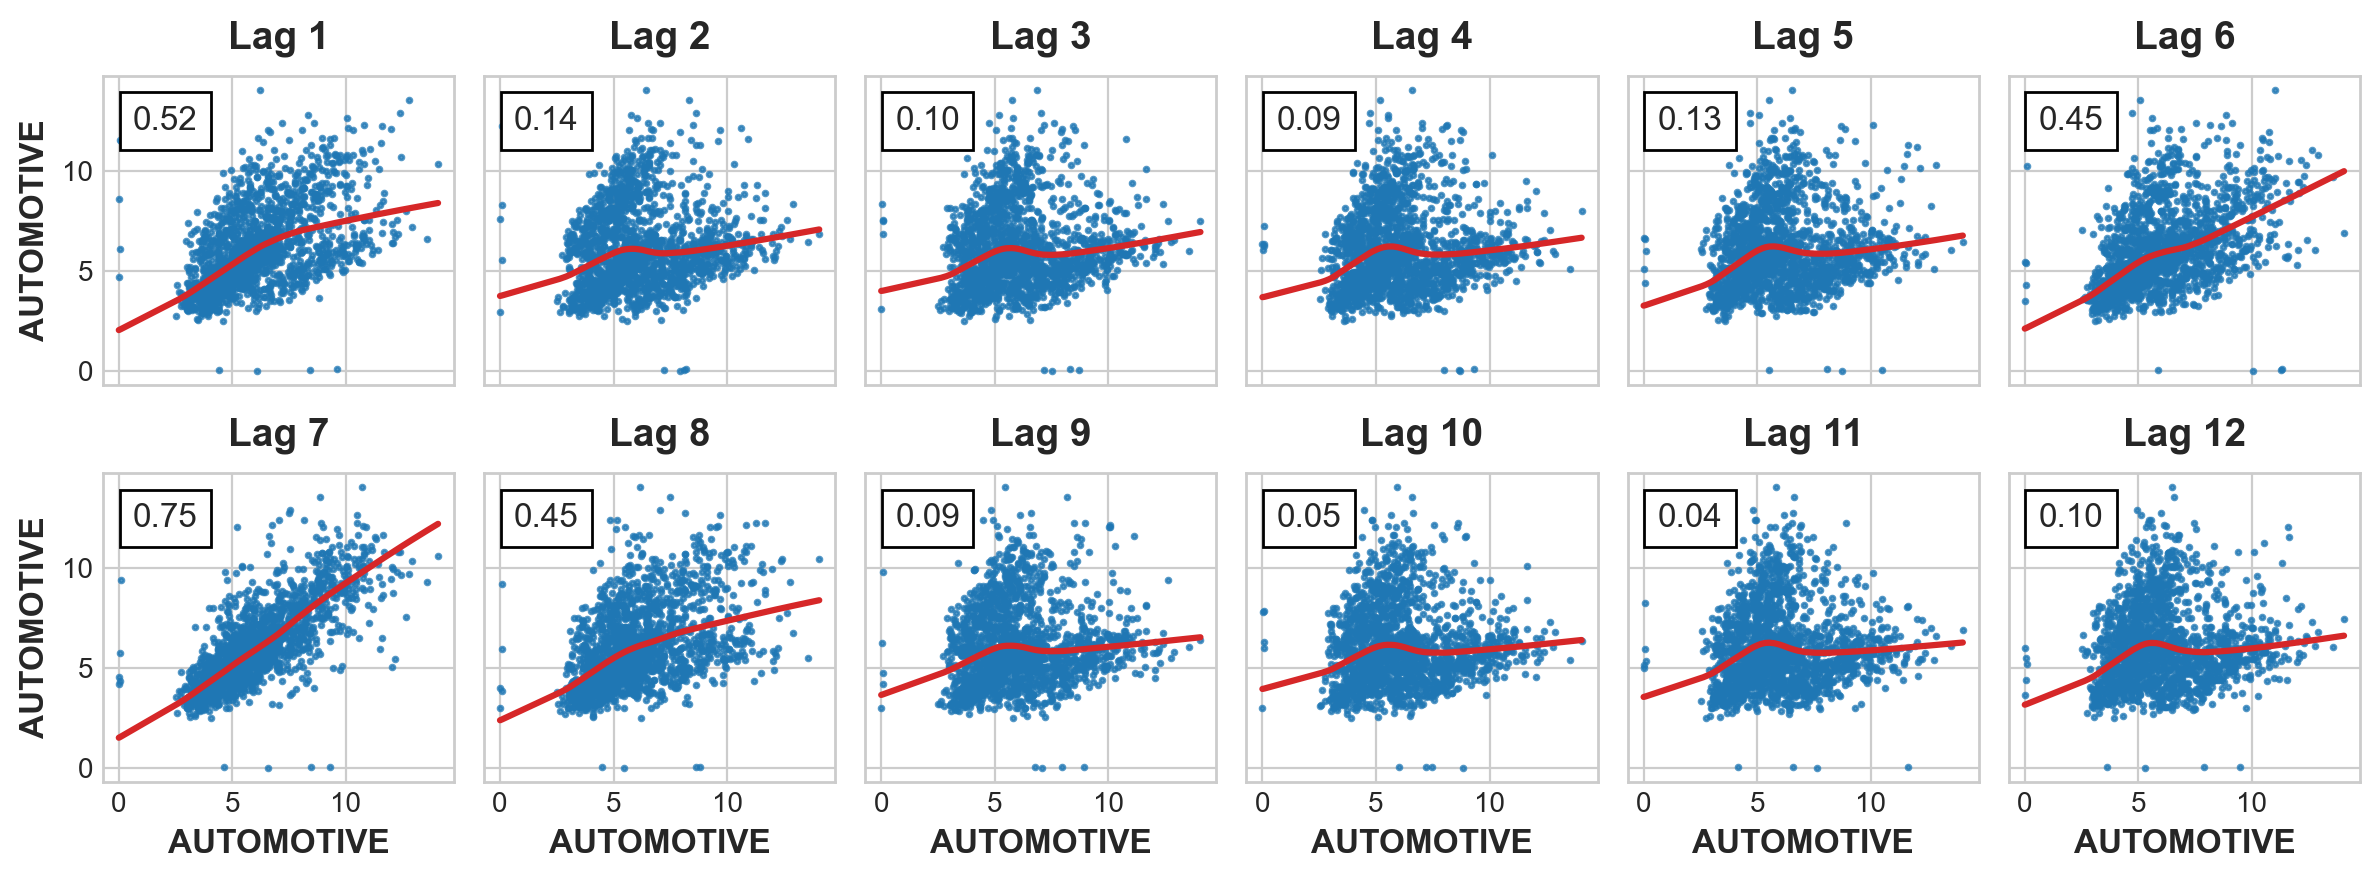

In [36]:
plot_lags(family_sales.sales['AUTOMOTIVE'], lags=12, nrows=2)

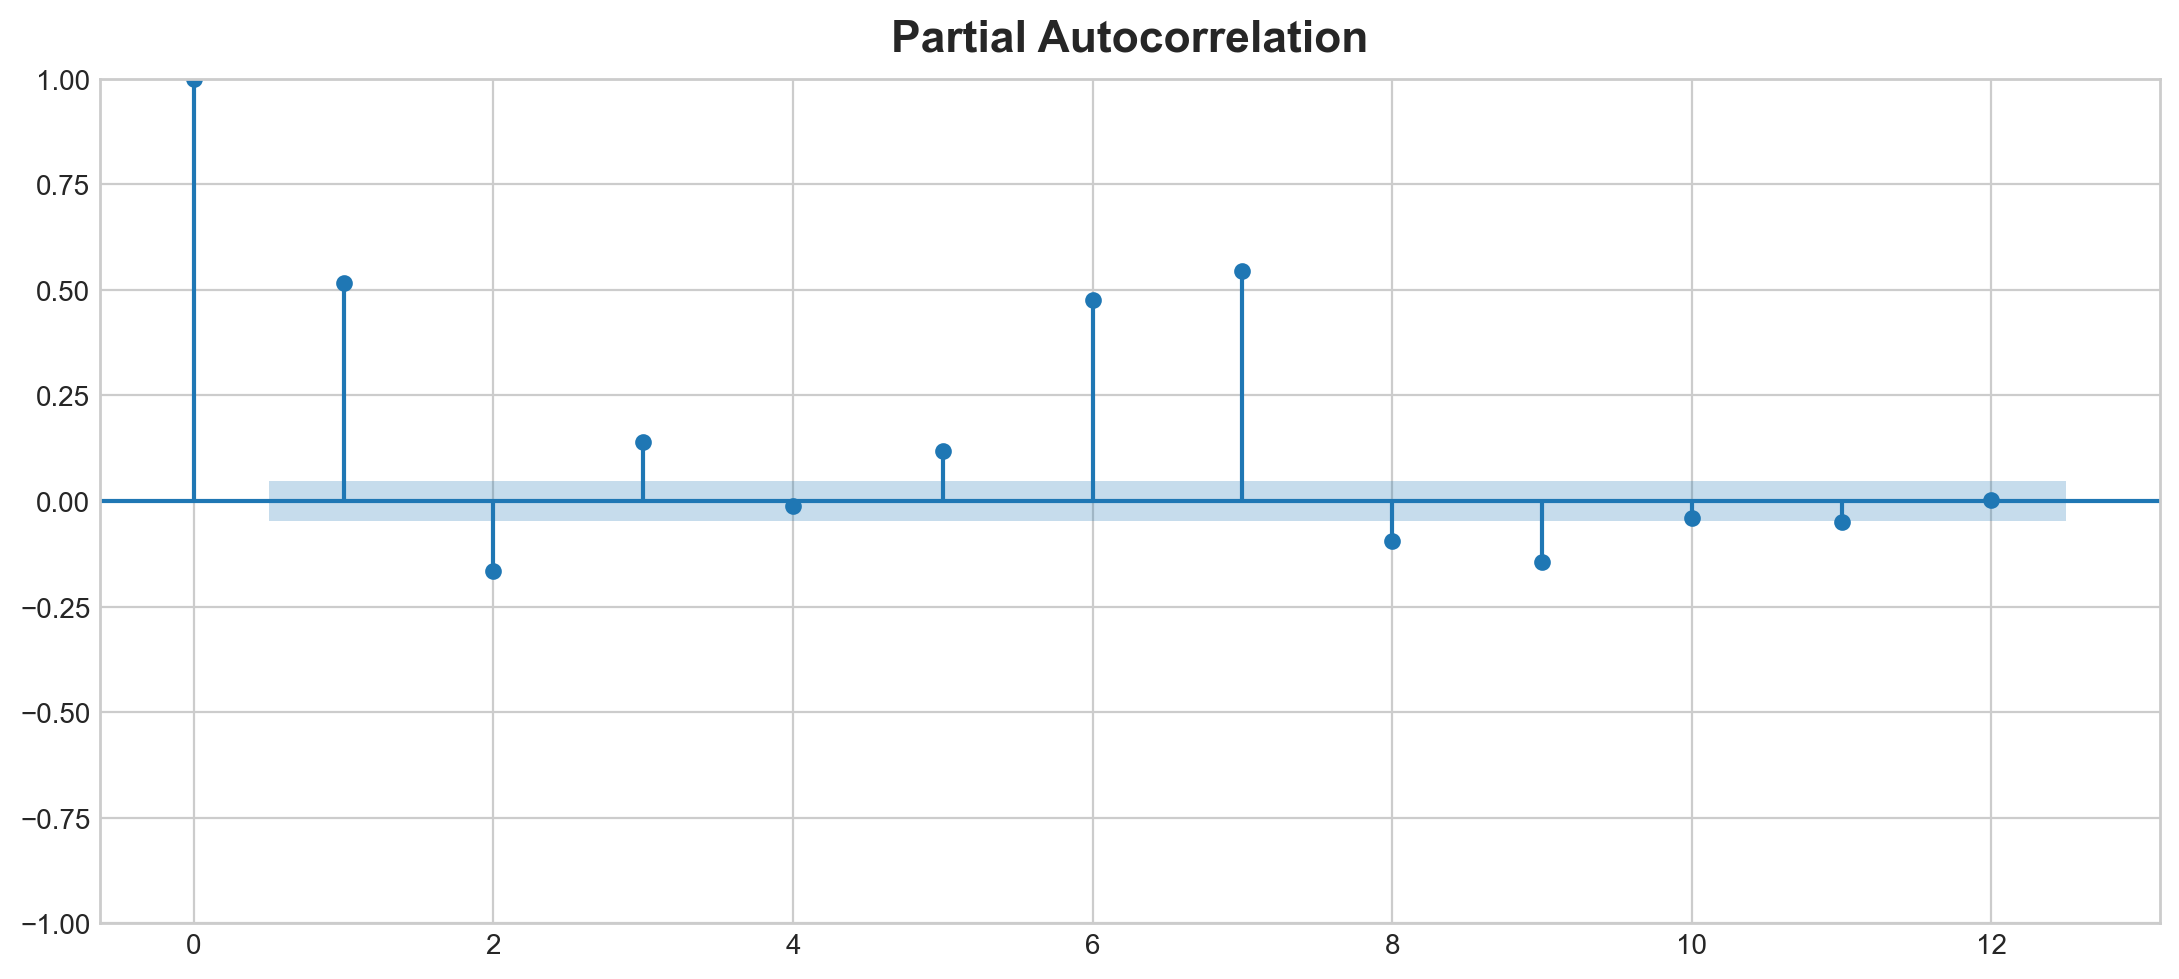

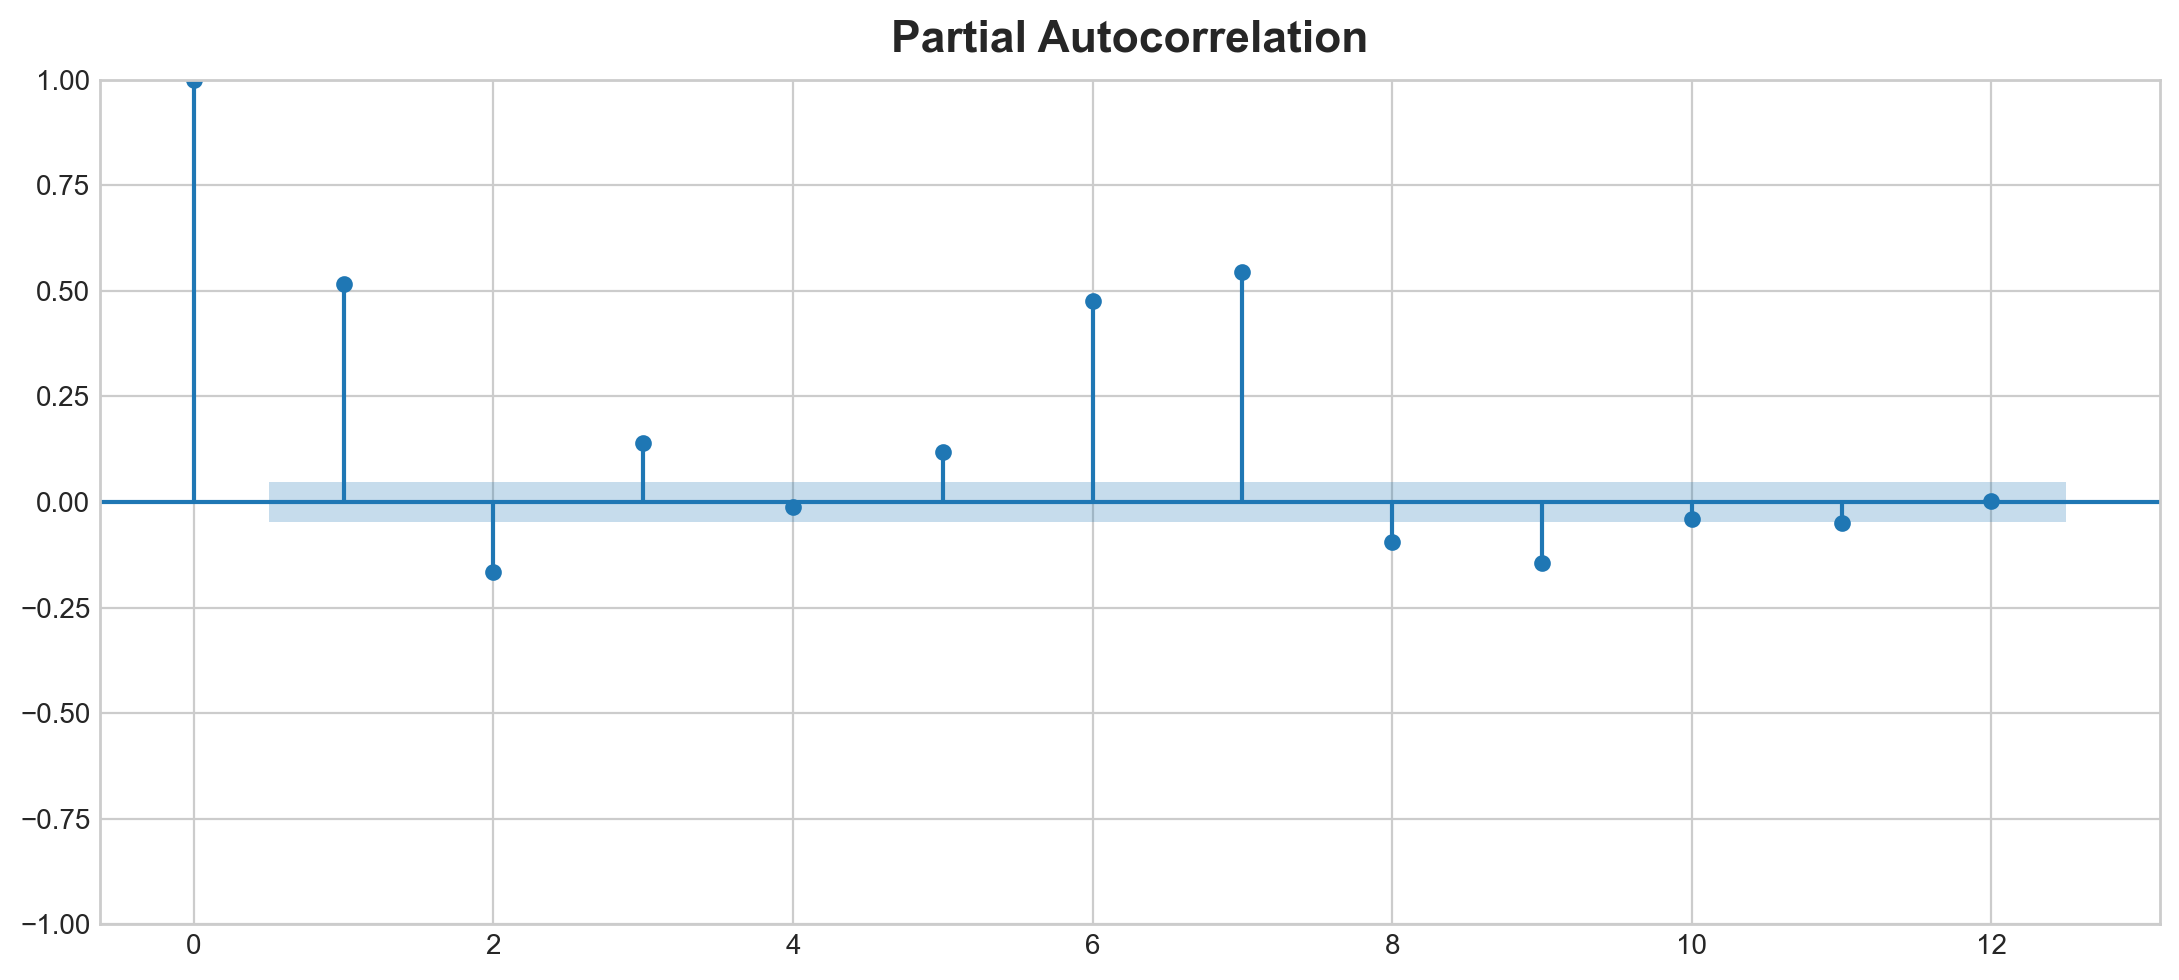

In [37]:
plot_pacf(family_sales.sales["AUTOMOTIVE"], lags=12)

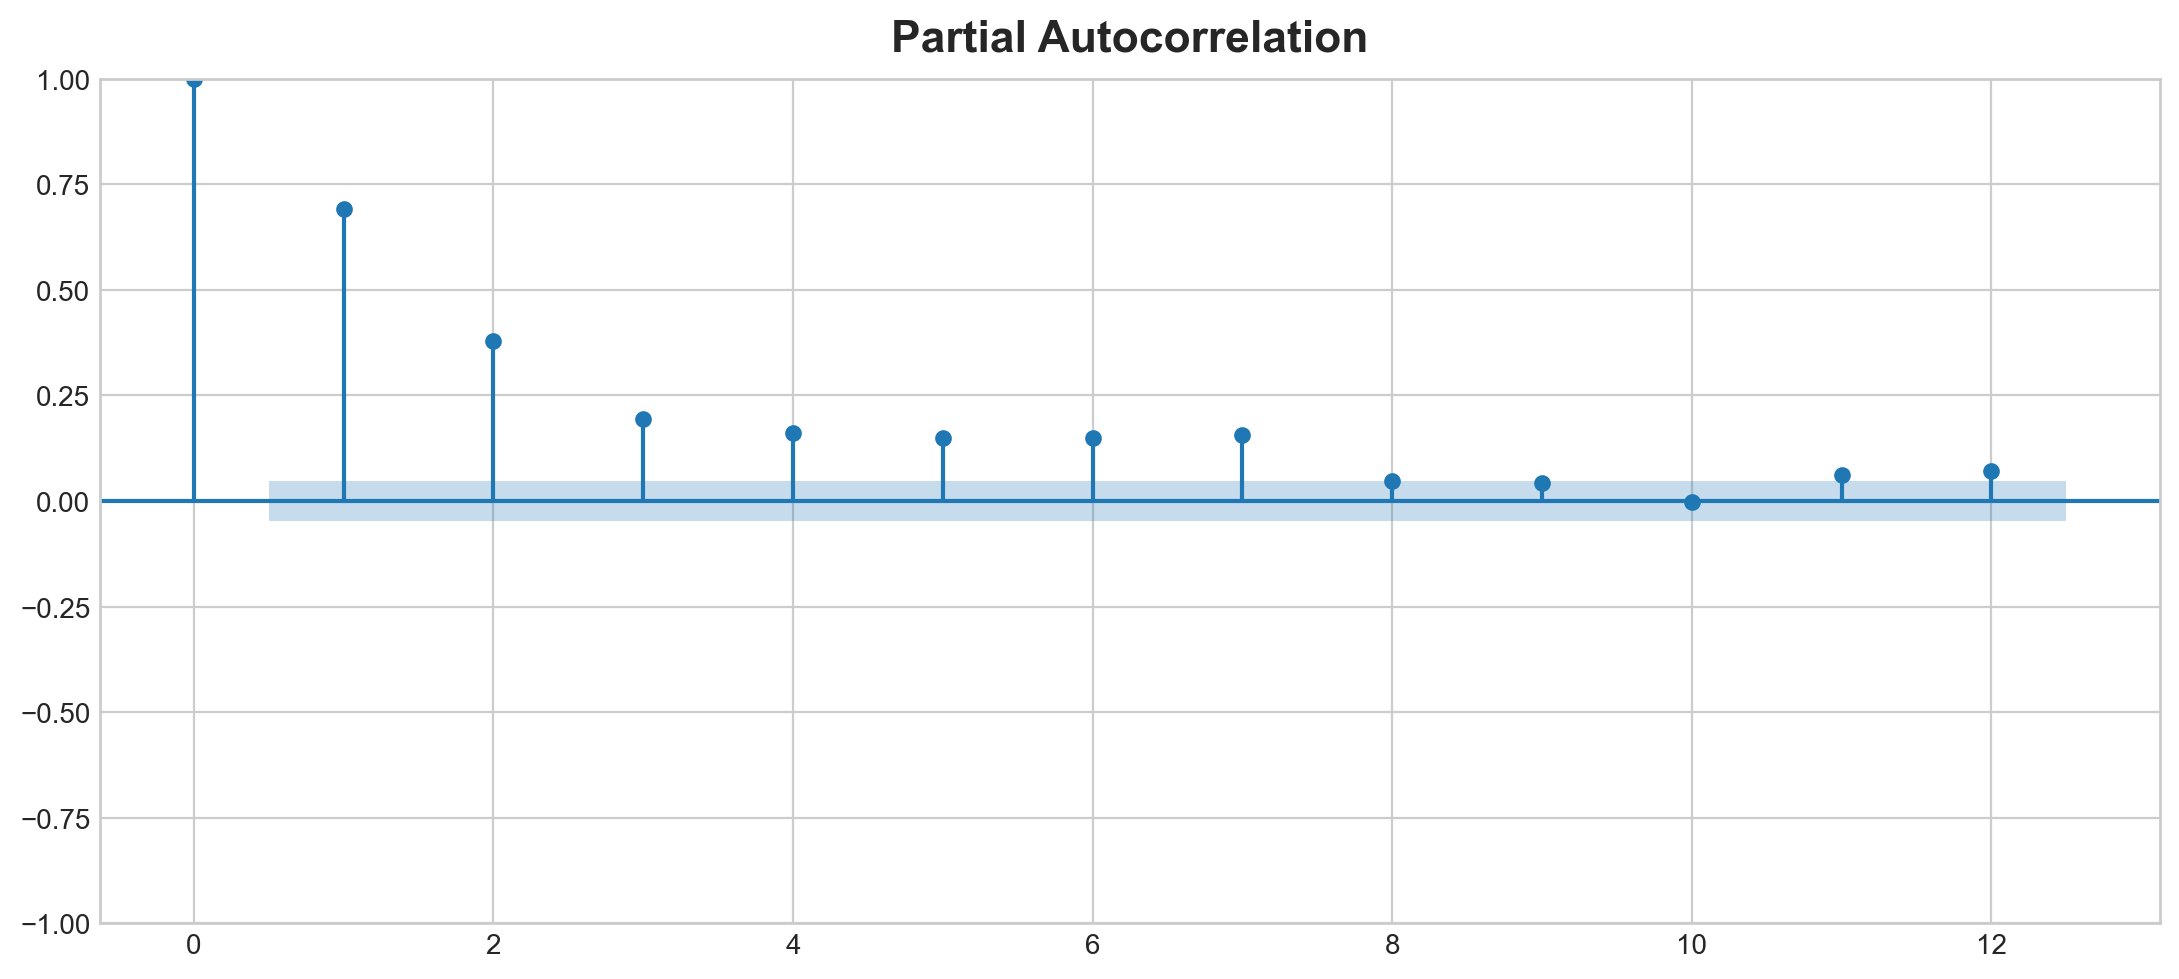

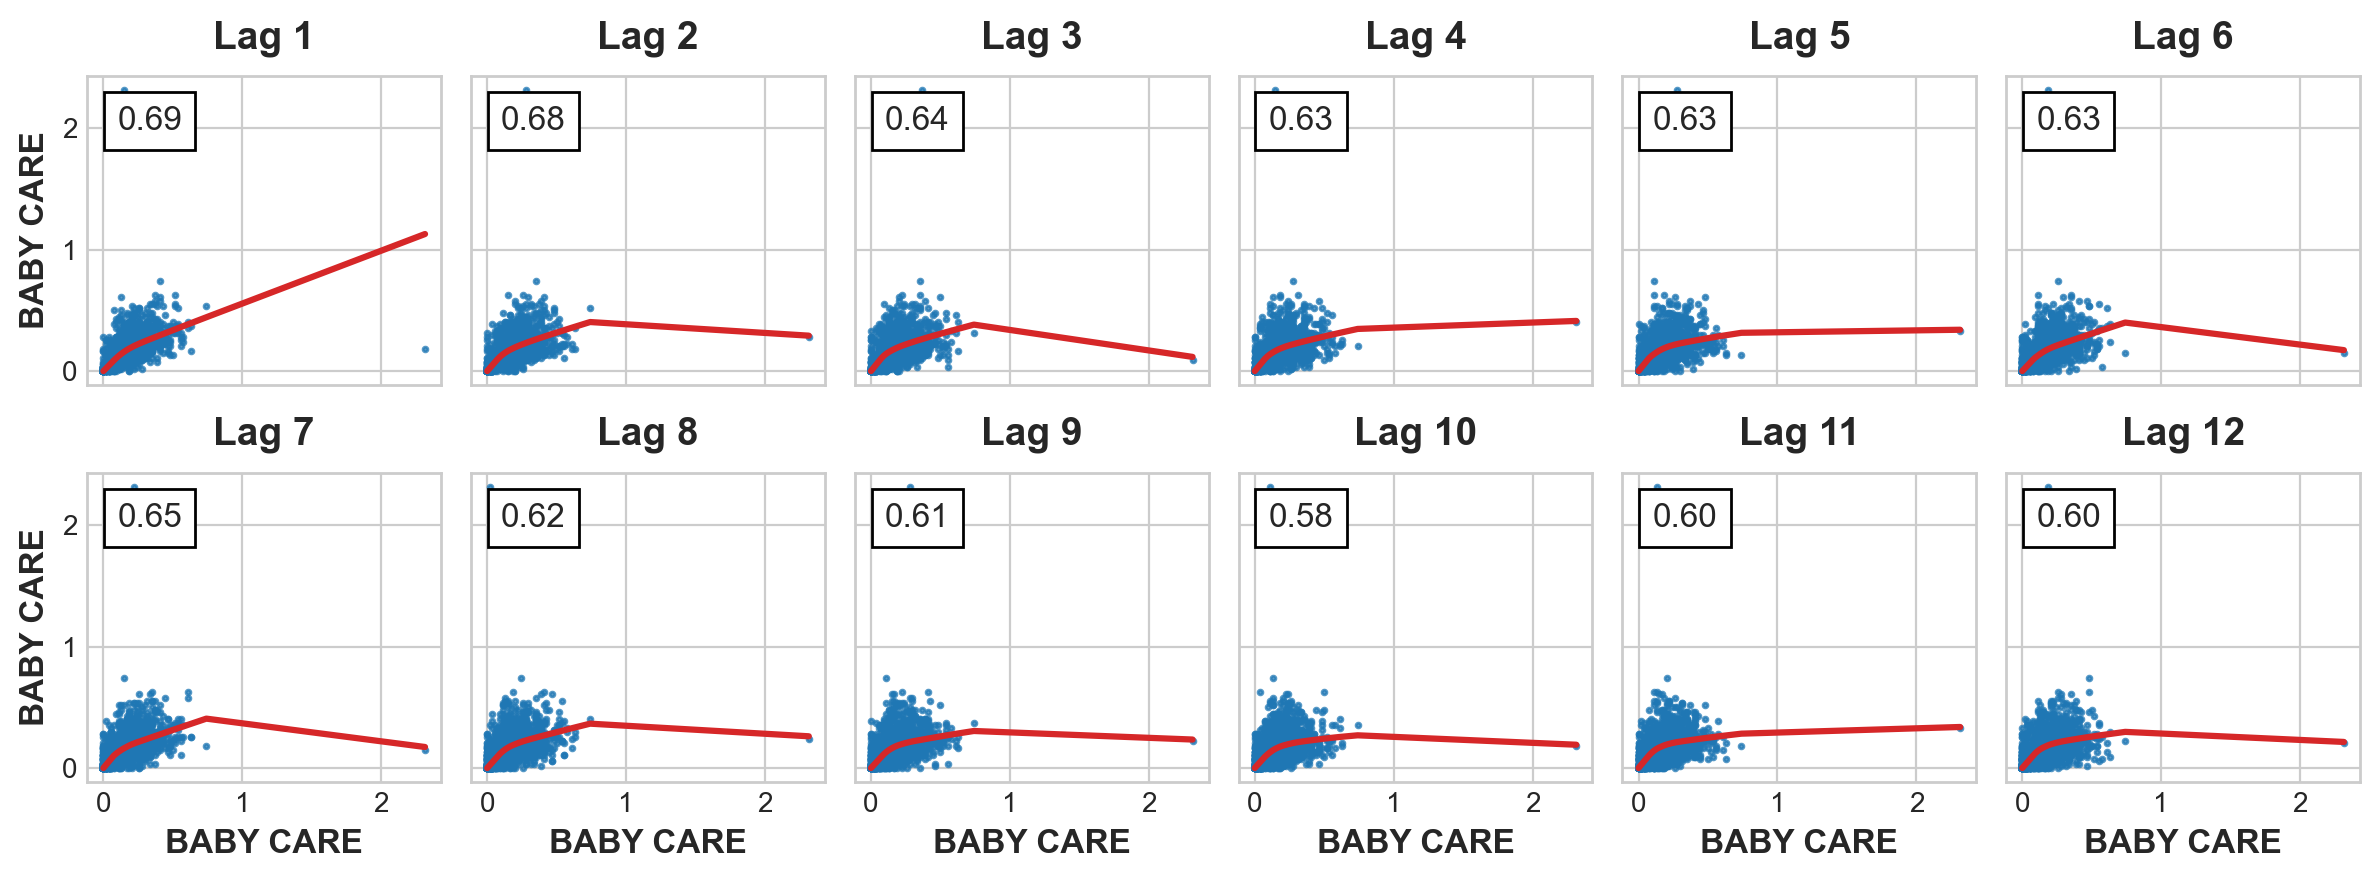

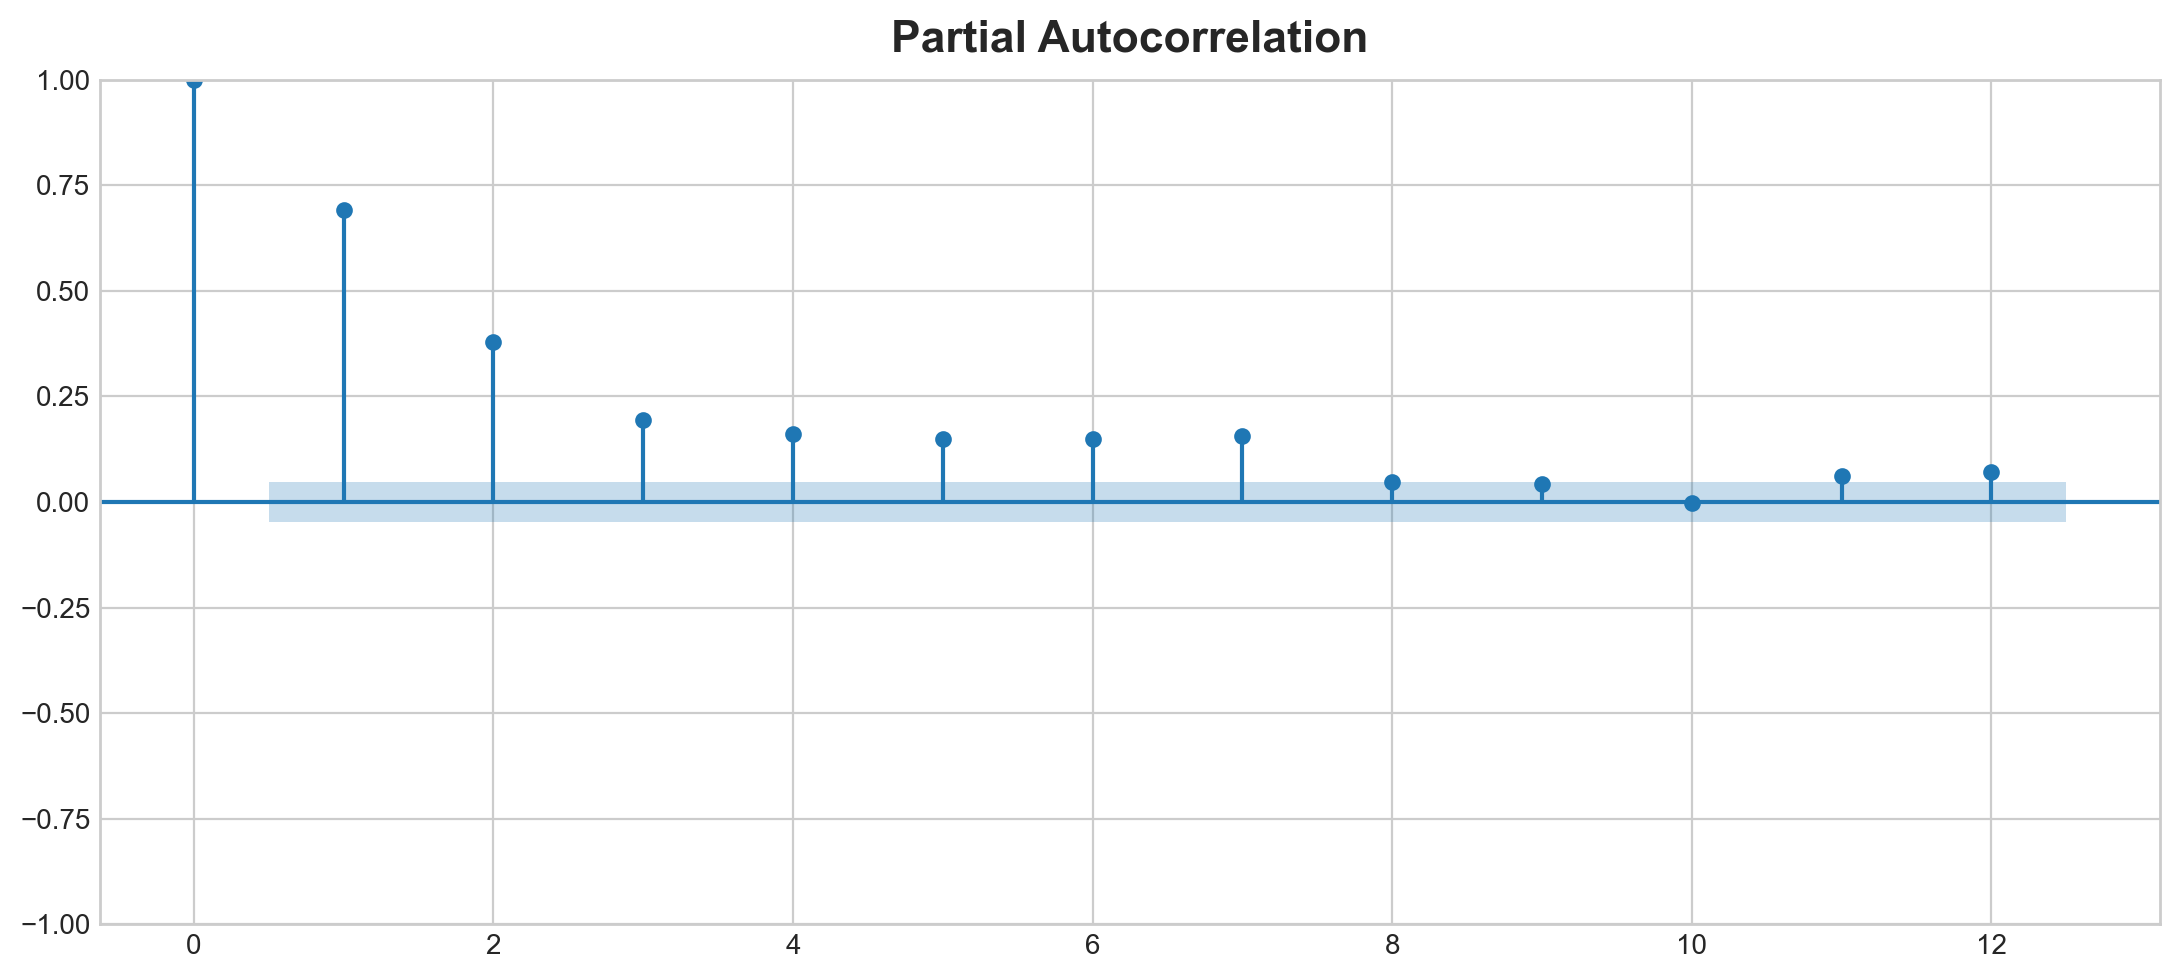

In [38]:
plot_lags(family_sales.sales["BABY CARE"], lags=12, nrows=2)
plot_pacf(family_sales.sales["BABY CARE"], lags=12)

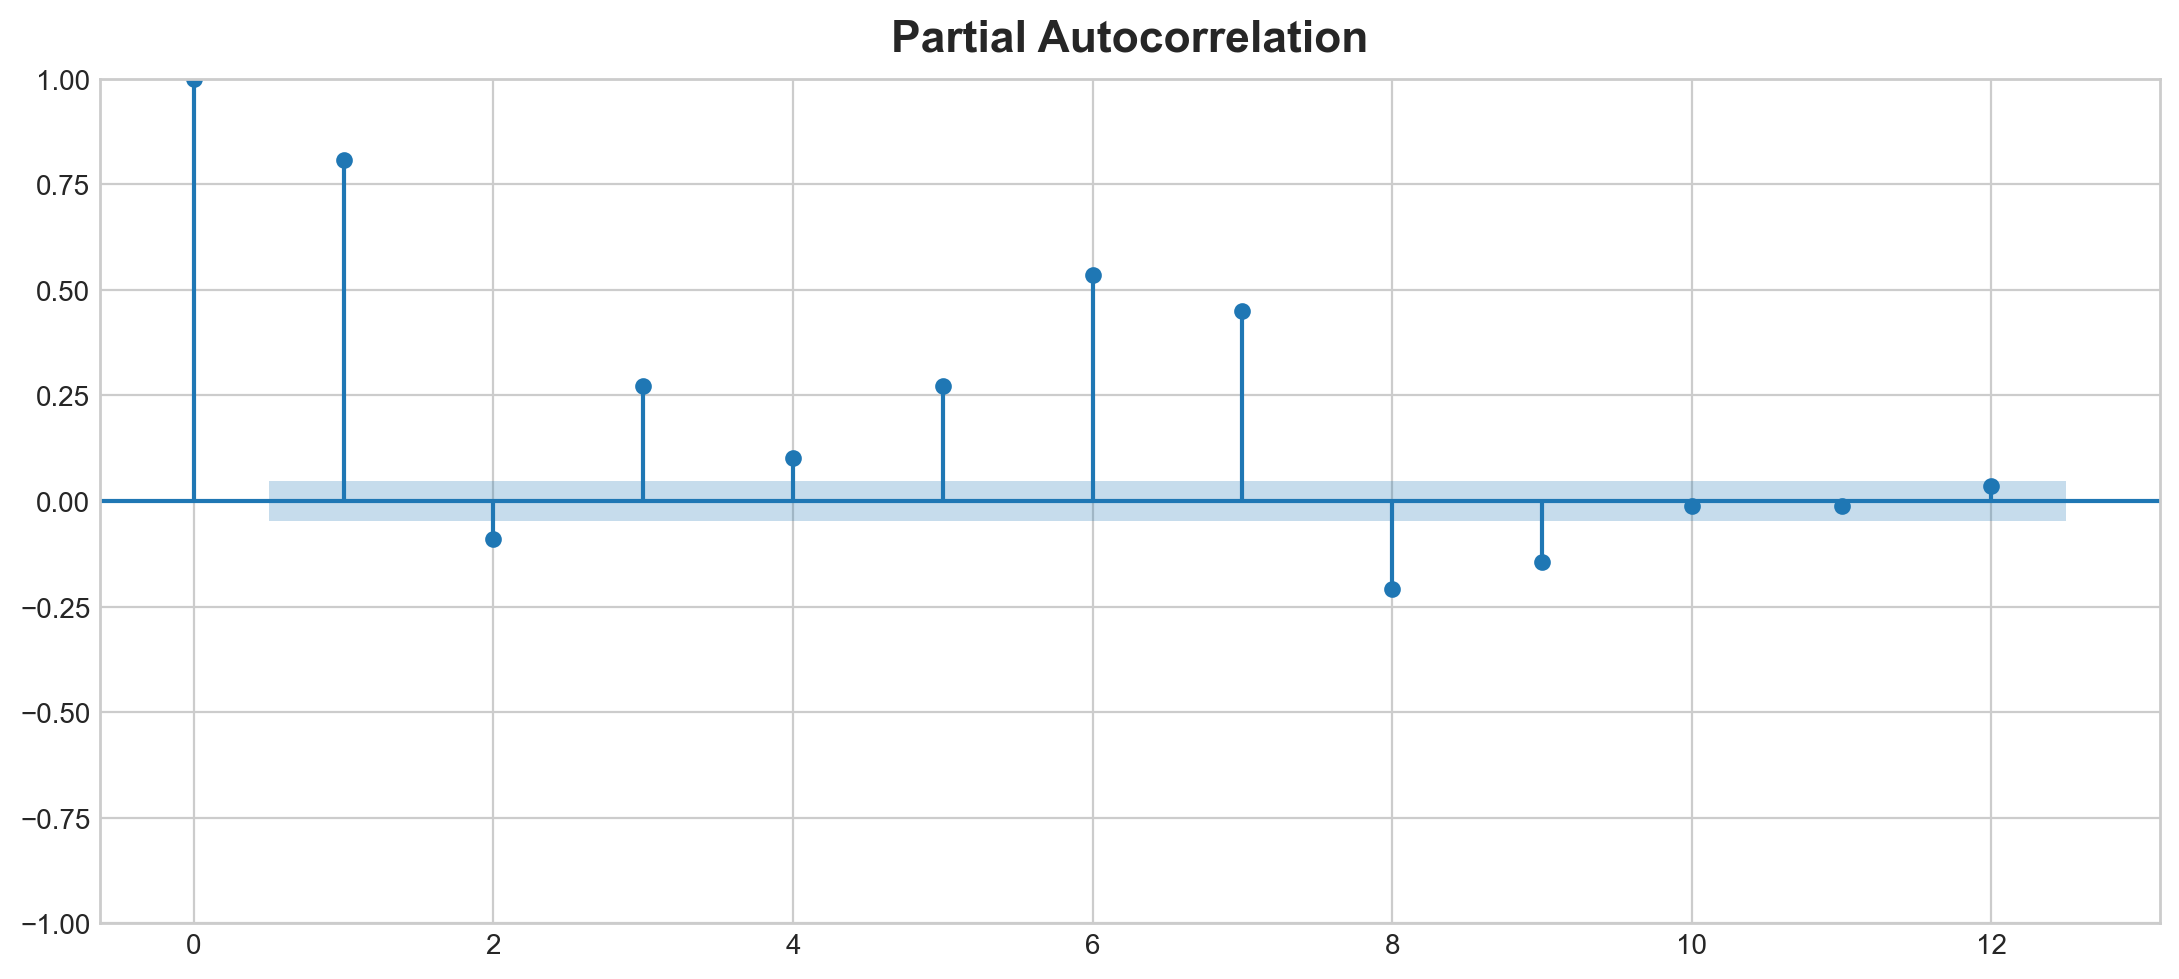

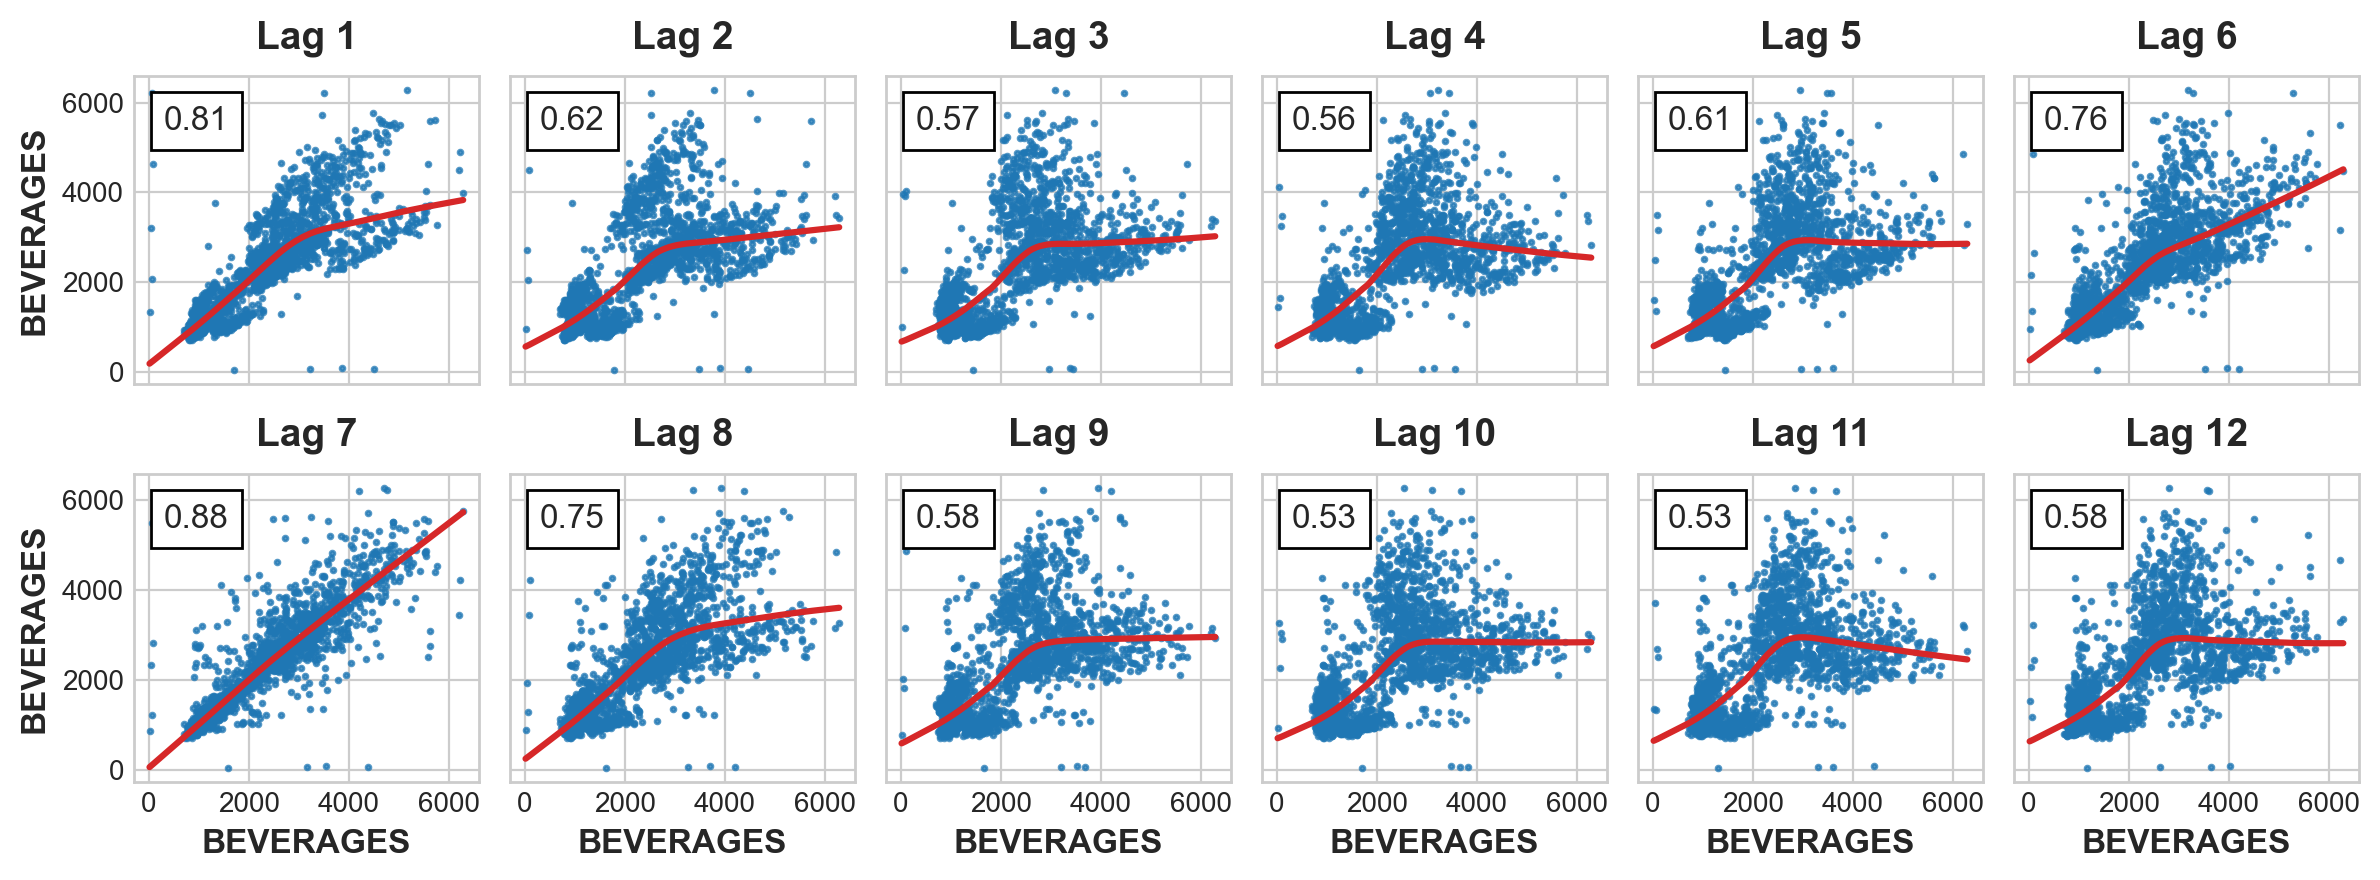

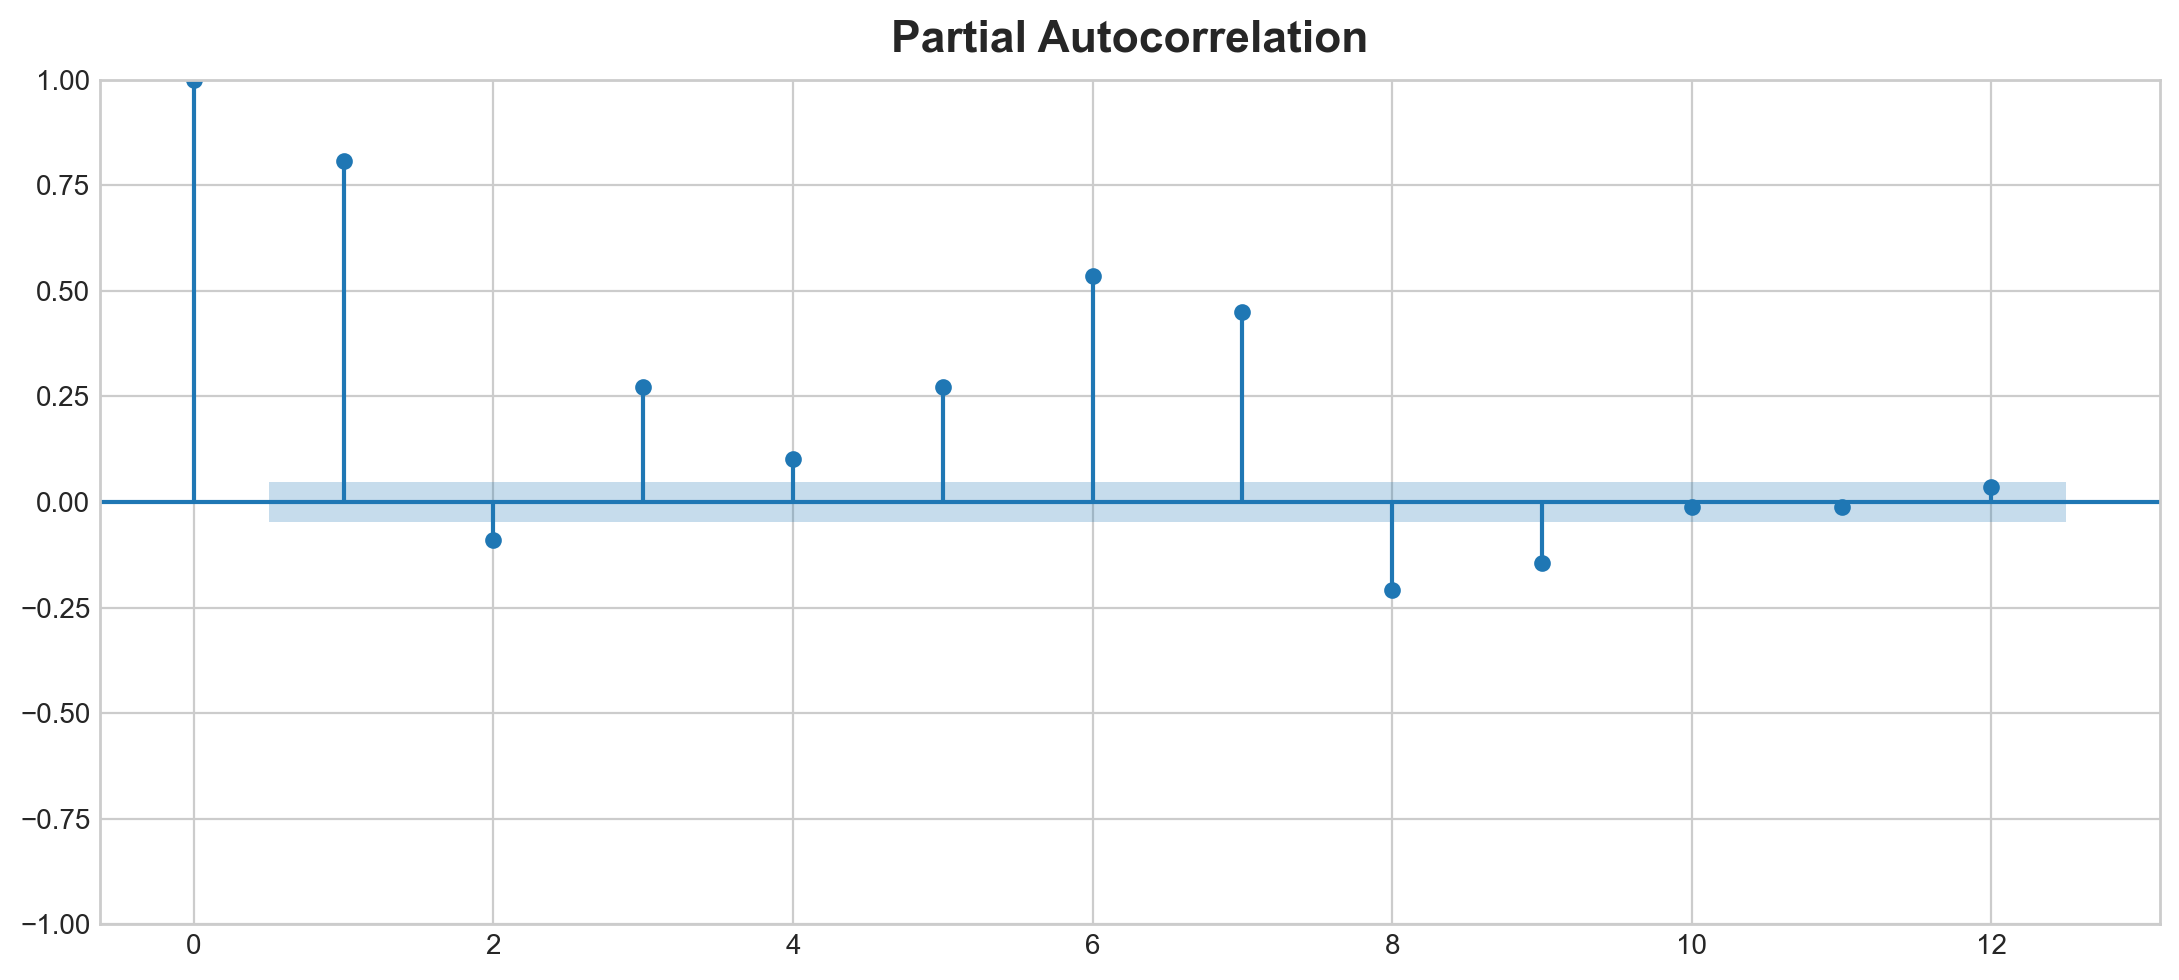

In [39]:
plot_lags(family_sales.sales["BEVERAGES"], lags=12, nrows=2)
plot_pacf(family_sales.sales["BEVERAGES"], lags=12)

In [40]:
family_sales.loc['2016-10-01':'2016-11-01' ,('sales', "BOOKS")]

date
2016-10-01    0.000000
2016-10-02    0.000000
2016-10-03    0.000000
2016-10-04    0.000000
2016-10-05    0.000000
2016-10-06    0.000000
2016-10-07    0.000000
2016-10-08    0.018519
2016-10-09    0.203704
2016-10-10    0.259259
2016-10-11    0.370370
2016-10-12    2.055556
2016-10-13    2.018518
2016-10-14    1.925926
2016-10-15    2.166667
2016-10-16    2.351852
2016-10-17    1.537037
2016-10-18    2.037037
2016-10-19    1.666667
2016-10-20    1.444444
2016-10-21    1.777778
2016-10-22    2.111111
2016-10-23    1.740741
2016-10-24    1.555556
2016-10-25    0.981481
2016-10-26    1.537037
2016-10-27    0.962963
2016-10-28    1.296296
2016-10-29    1.129630
2016-10-30    1.148148
2016-10-31    0.722222
2016-11-01    1.074074
Freq: D, Name: (sales, BOOKS), dtype: float32

# Result

In [41]:
d={'trend':['yes', 'no', 'no','no','yes','yes'], 'seasons(week)': ['yes','yes','yes','yes','no', 'no'],
                        'seasons(Fourier features order)': ['no', 'no', 6, 4, 2, 'no']}
data_result=pd.DataFrame( data=d, index=['group_1', 'group_2', 'group_3', 'group_4', 'group_5', 'group_6'])
data_result

trend seasons(week) seasons(Fourier features order)
group_1   yes           yes                              no
group_2    no           yes                              no
group_3    no           yes                               6
group_4    no           yes                               4
group_5   yes            no                               2
group_6   yes            no                              no

In [42]:
group_1=['AUTOMOTIVE', 'BEAUTY', 'BEVERAGES','BREAD/BAKERY', 'CLEANING', 'DAIRY', 'DELI', 'EGGS', 'GROCERY I', 'LIQUOR,WINE,BEER','PERSONAL CARE', 'HARDWARE', 'PET SUPPLIES']
group_2=['CELEBRATION','LAWN AND GARDEN', 'MEATS', 'POULTRY', 'PREPARED FOODS', 'SEAFOOD','FROZEN FOODS', 'GROCERY II']
group_3=['HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES', 'HOME CARE', 'LADIESWEAR','PLAYERS AND ELECTRONICS', 'PRODUCE']
group_4=['BABY CARE','LINGERIE', 'MAGAZINES']
group_5=['SCHOOL AND OFFICE SUPPLIES']
group_6=['BOOKS']

### 6 Lags gor every group